# **Import and Install Libraries**

In [ ]:
!pip install pycaret

In [ ]:
import os
import cv2

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from skimage.feature import local_binary_pattern
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, precision_recall_fscore_support, mutual_info_score, normalized_mutual_info_score

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import re

import seaborn as sns

from keras.preprocessing import image
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.resnet import ResNet152, preprocess_input
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.nasnet import NASNetLarge, preprocess_input
from keras.applications.efficientnet_v2 import EfficientNetV2L, preprocess_input
from keras.applications.efficientnet import EfficientNetB0, preprocess_input
from keras.applications.efficientnet import EfficientNetB7, preprocess_input
from google.colab import drive

from PIL import Image

from pycaret.classification import *

import random

In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
base_adr = './drive/MyDrive/'

# **Explore Data and Feature Engineering**

In [ ]:
df = pd.read_csv(base_adr + 'leaves.csv', header=None)

In [ ]:
df

0   1        2       3        4        5        6         7         8   \
0     1   1  0.72694  1.4742  0.32396  0.98535  1.00000  0.835920  0.004657   
1     1   2  0.74173  1.5257  0.36116  0.98152  0.99825  0.798670  0.005242   
2     1   3  0.76722  1.5725  0.38998  0.97755  1.00000  0.808120  0.007457   
3     1   4  0.73797  1.4597  0.35376  0.97566  1.00000  0.816970  0.006877   
4     1   5  0.82301  1.7707  0.44462  0.97698  1.00000  0.754930  0.007428   
..   ..  ..      ...     ...      ...      ...      ...       ...       ...   
335  36   6  0.37522  1.1417  0.81725  0.68511  0.58772  0.125230  0.091860   
336  36   7  0.28064  1.0849  0.75319  0.72152  0.71404  0.136860  0.078996   
337  36   8  0.35344  1.0329  0.78147  0.70737  0.61579  0.135030  0.089763   
338  36   9  0.59988  1.1427  0.71532  0.66101  0.47544  0.157470  0.113370   
339  36  10  0.47195  1.0901  0.85409  0.53598  0.39649  0.078376  0.132270   

           9         10        11        12        13        14       15  
0    0.003947  0.047790  0.127950  0.016108  0.005232  0.000275  1.17560  
1    0.005002  0.024160  0.090476  0.008119  0.002708  0.000075  0.69659  
2    0.010121  0.011897  0.057445  0.003289  0.000921  0.000038  0.44348  
3    0.008607  0.015950  0.065491  0.004271  0.001154  0.000066  0.58785  
4    0.010042  0.007938  0.045339  0.002051  0.000560  0.000024  0.34214  
..        ...       ...       ...       ...       ...       ...      ...  
335  1.535800  0.114880  0.208610  0.041703  0.013344  0.000820  2.02810  
336  1.135800  0.141220  0.218300  0.045488  0.012002  0.001515  2.40590  
337  1.466400  0.097663  0.207030  0.041101  0.016123  0.000453  1.69350  
338  2.339400  0.050389  0.135850  0.018121  0.006190  0.000265  1.15260  
339  3.184000  0.082007  0.187820  0.034074  0.013487  0.000329  1.56230  

[340 rows x 16 columns]

In [ ]:
# If you have specific column names, you can add them here
column_names = ['target', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
df.columns = column_names

In [ ]:
len(df['target'].value_counts())

30

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  340 non-null    int64  
 1   1       340 non-null    int64  
 2   2       340 non-null    float64
 3   3       340 non-null    float64
 4   4       340 non-null    float64
 5   5       340 non-null    float64
 6   6       340 non-null    float64
 7   7       340 non-null    float64
 8   8       340 non-null    float64
 9   9       340 non-null    float64
 10  10      340 non-null    float64
 11  11      340 non-null    float64
 12  12      340 non-null    float64
 13  13      340 non-null    float64
 14  14      340 non-null    float64
 15  15      340 non-null    float64
dtypes: float64(14), int64(2)
memory usage: 42.6 KB


## **Plots**

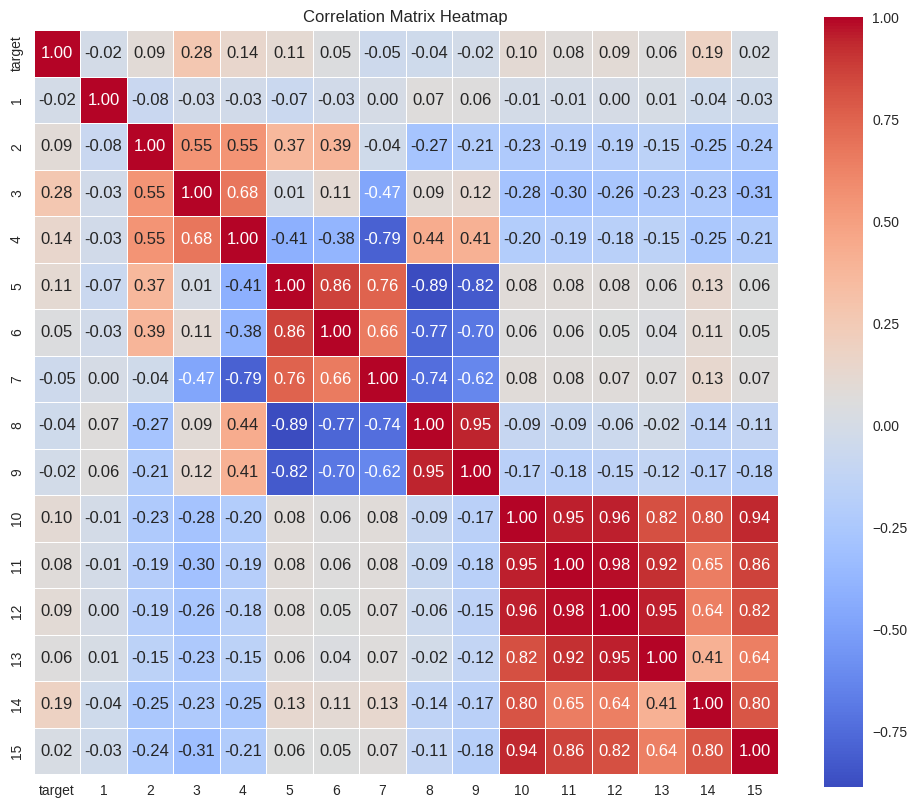

In [ ]:
# Plot the heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

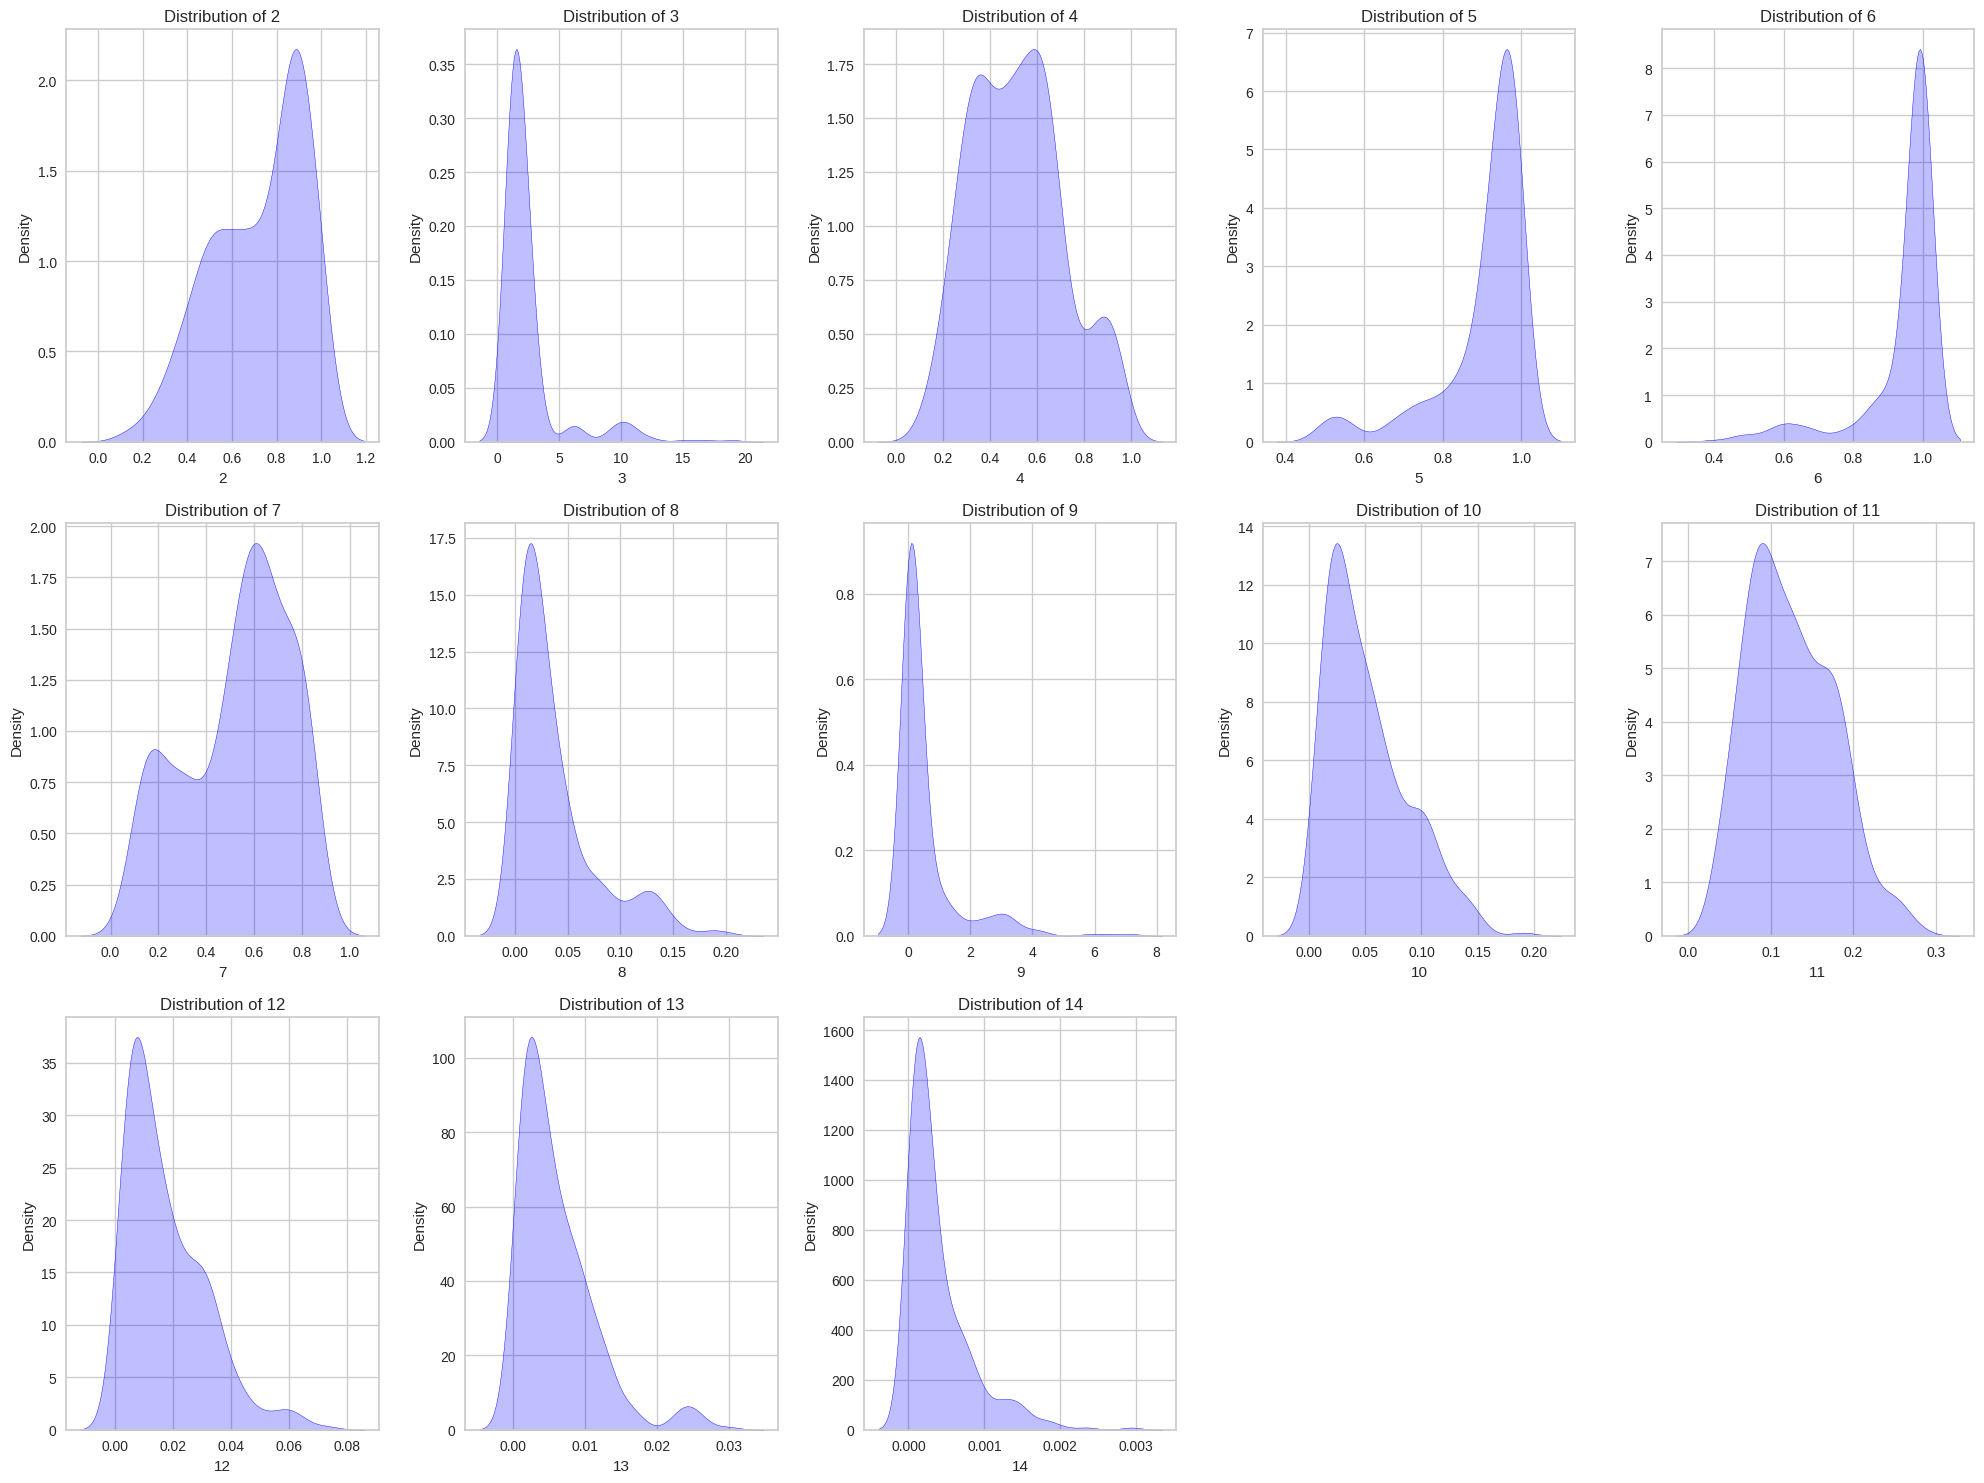

In [ ]:
# Define the range of columns to plot
columns_to_plot = df.columns[2:15]  # Columns 2 to 15
n_cols = 5  # Number of plots per row
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Number of rows needed

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.kdeplot(df[col], ax=axes[i], shade=True, color='blue')
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


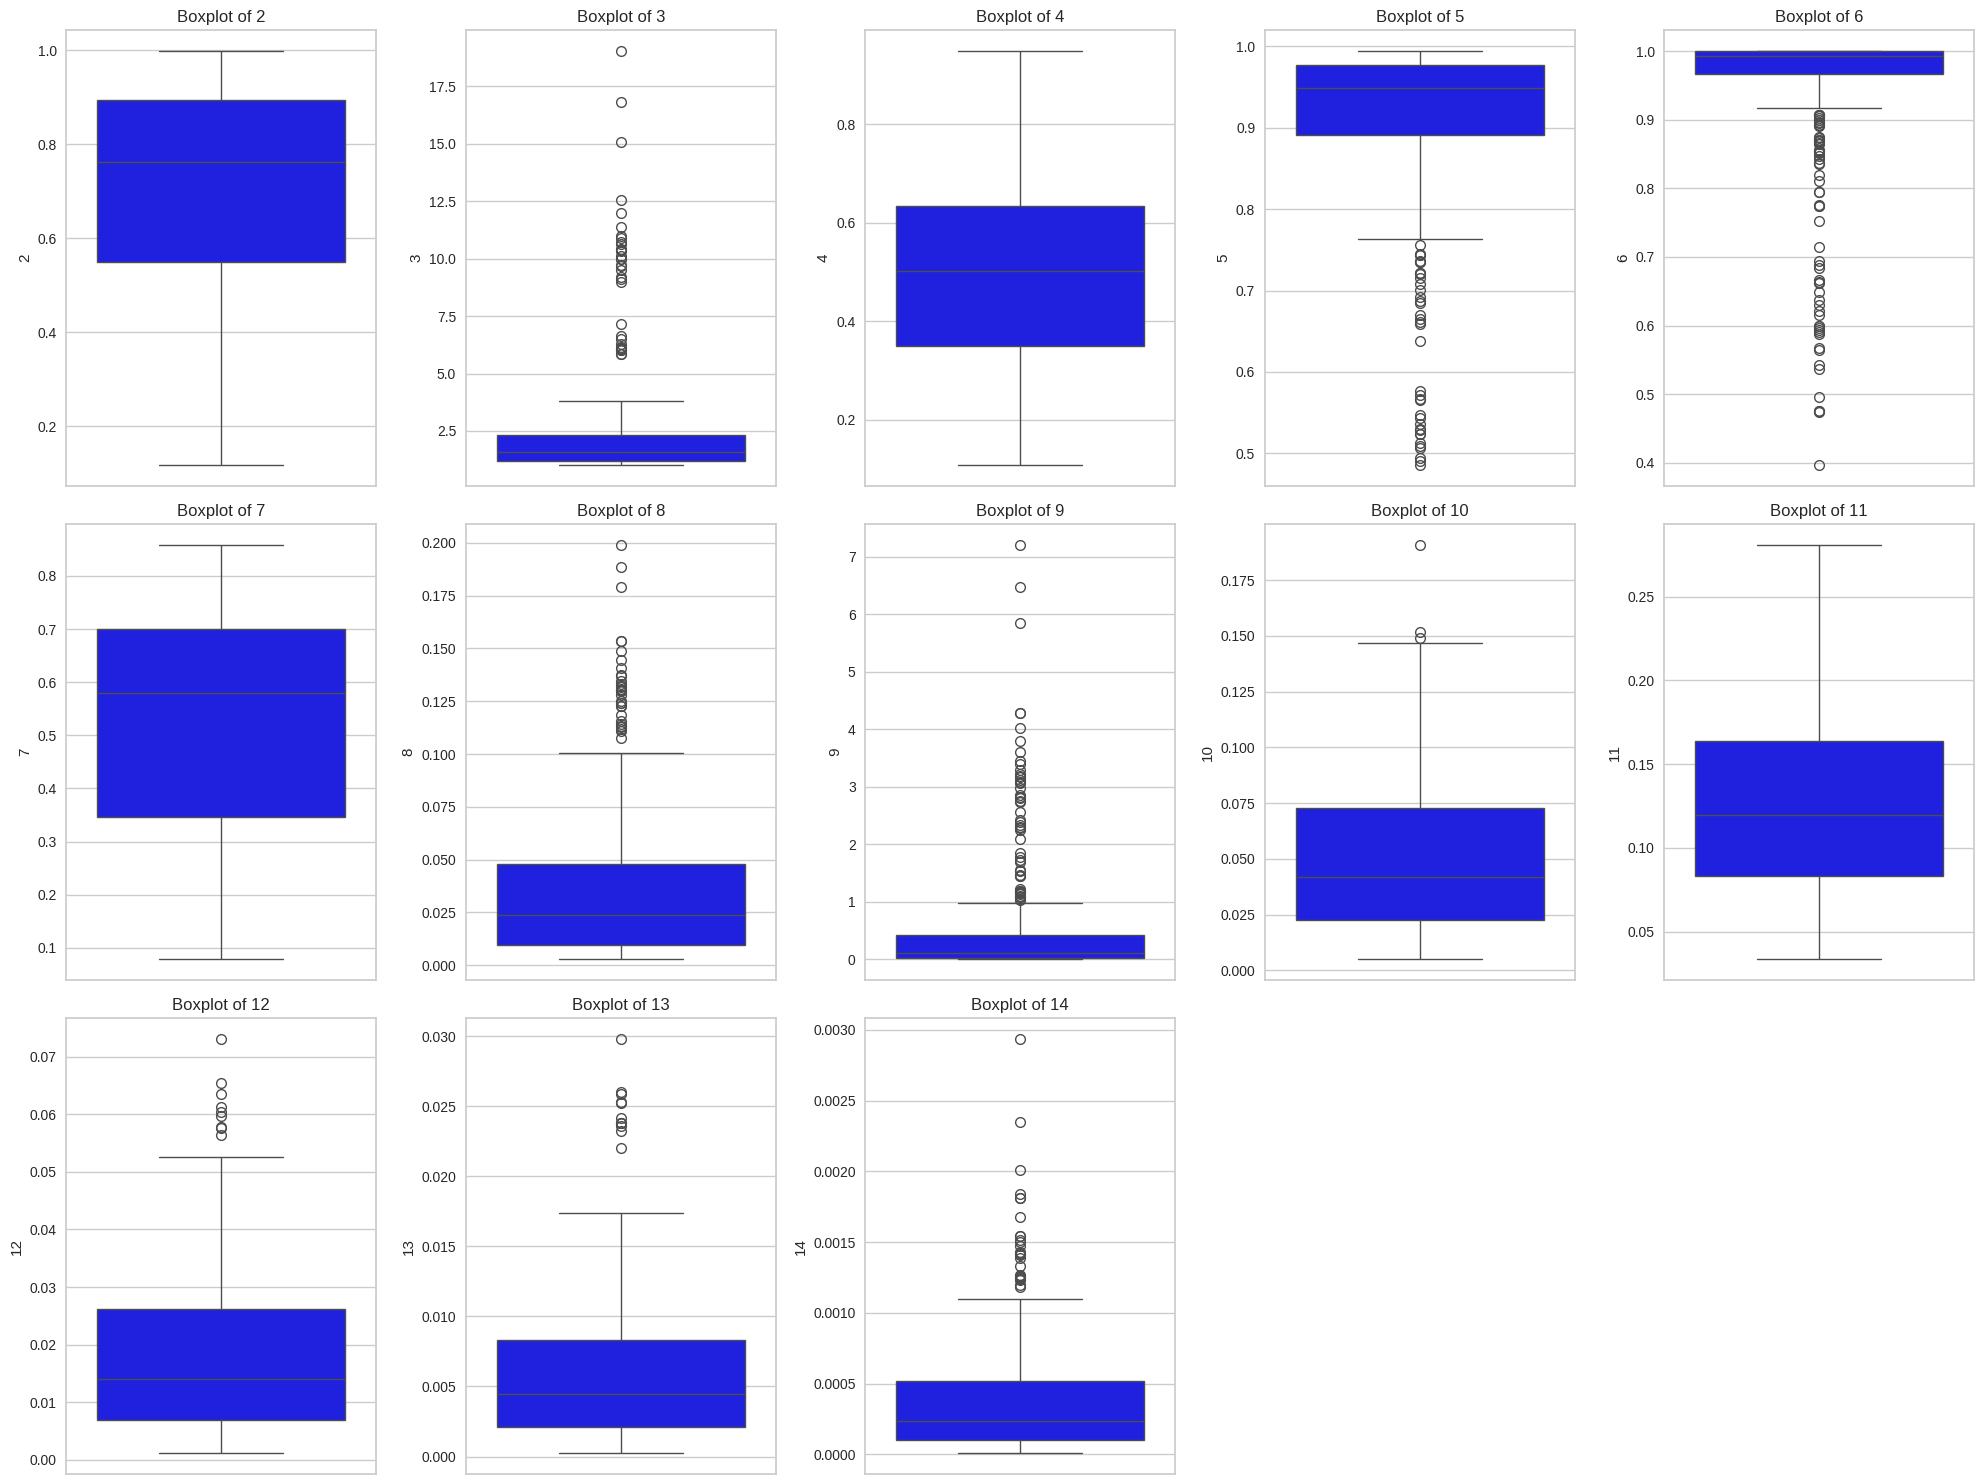

In [ ]:
# Create the subplots for boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df[col], ax=axes[i], color='blue')
    axes[i].set_title(f'Boxplot of {col}')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Extract Features based on EfficientNetB7, Coloring Histogram, Local binary patterns**

In [ ]:
def sort_files_numerically(files):
    def extract_file_number(file_name):
        match = re.search(r"EX(\d+)", file_name)
        if match:
            return int(match.group(1))
        else:
            return float('inf')  # Handle cases where the pattern is not found
    return sorted(files, key=extract_file_number)

In [ ]:
# Load EfficientNetB7 model pre-trained on ImageNet
base_model = EfficientNetB7(weights='imagenet')
# Select the layer from which you want to extract features.
# Typically, this is one of the last fully connected layers.
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

268326632/268326632 [==============================] - 2s 0us/step


In [ ]:
def extract_features(img_path):
    # Load image with target size for ResNet152
    img = image.load_img(img_path, target_size=(600, 600))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    # Extract features
    resnet_features = model.predict(img_data)
    return resnet_features

In [ ]:
# Directory containing your dataset images
dataset_directory = base_adr + 'leaves'

# List all directories and sort them numerically
directories = [d for d in os.listdir(dataset_directory) if os.path.isdir(os.path.join(dataset_directory, d))]
sorted_directories = sorted(directories, key=lambda x: int(x))

lbp_features_list = []
hist_features_list = []
efficient_net_features_list = []
photo_adrs = []

# Iterate through sorted directories
for dir_name in sorted_directories:
    dir_path = os.path.join(dataset_directory, dir_name)
    if os.path.isdir(dir_path):

        # List all files in the directory and sort them numerically
        files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
        sorted_files = sort_files_numerically(files)

        # Iterate through sorted files
        for image_name in sorted_files:
            image_path = os.path.join(dir_path, image_name)
            if image_path.endswith(('.JPG')):

                #------------------------------------------------------------------------------------------
                # Compute LBP

                image_file = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image_file = cv2.resize(image_file, (256, 256))

                P, R = 8, 1
                lbp = local_binary_pattern(image_file, P, R, method="uniform")

                (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))

                hist = hist.astype("float")
                hist /= (hist.sum() + 1e-6)
                #------------------------------------------------------------------------------------------
                # Compute Coloring Histogram
                image_file = cv2.imread(image_path, cv2.COLOR_BGR2HSV)
                hsv_image = cv2.cvtColor(image_file, cv2.COLOR_BGR2HSV)

                bins=(8, 8, 8)
                hist_h = cv2.calcHist([hsv_image], [0], None, [bins[0]], [0, 256])
                hist_s = cv2.calcHist([hsv_image], [1], None, [bins[1]], [0, 256])
                hist_v = cv2.calcHist([hsv_image], [2], None, [bins[2]], [0, 256])

                hist_h = cv2.normalize(hist_h, hist_h).flatten()
                hist_s = cv2.normalize(hist_s, hist_s).flatten()
                hist_v = cv2.normalize(hist_v, hist_v).flatten()

                hist_features = np.concatenate([hist_h, hist_s, hist_v])
                #------------------------------------------------------------------------------------------
                # Compute EfficientNetB7 features
                efficient_net_features = extract_features(image_path)[0]
                #------------------------------------------------------------------------------------------

                lbp_features_list.append(hist)
                hist_features_list.append(hist_features)
                efficient_net_features_list.append(efficient_net_features)
                photo_adrs.append(image_path)

In [ ]:
efficient_net_features_df = pd.DataFrame(efficient_net_features_list)
df_with_efficient_net = pd.concat([df, efficient_net_features_df], axis=1)

In [ ]:
lbp_features_df = pd.DataFrame(lbp_features_list)
df_with_lbp = pd.concat([df_with_efficient_net, lbp_features_df], axis=1)

In [ ]:
hist_features_df = pd.DataFrame(hist_features_list)
df_with_hist = pd.concat([df_with_lbp, hist_features_df], axis=1)

In [ ]:
path_df = pd.DataFrame(photo_adrs)
df_train = pd.concat([df_with_hist, path_df], axis=1)

In [ ]:
# Function to make column names unique
def make_column_names_unique(df):
    unique_col = ['target']
    for i in range(df.shape[1] - 1):
      unique_col.append(i)

    df.columns = unique_col
    return df

df_train = make_column_names_unique(df_train)

In [ ]:
df_train

## **Load & Save Final Dataset**

In [ ]:
df_train.to_csv('dfWithEfficientNetB7withPath.csv', sep='\t', encoding='utf-8')

In [ ]:
df_train = pd.read_csv(base_adr + 'dfWithEfficientNetB7withPathFinal.csv', sep='\t', encoding='utf-8', index_col=False)

In [ ]:
df_train = df_train.drop(columns=['Unnamed: 0', '0'])

In [ ]:
df_train

target        1       2        3        4        5         6         7  \
0         1  0.72694  1.4742  0.32396  0.98535  1.00000  0.835920  0.004657   
1         1  0.74173  1.5257  0.36116  0.98152  0.99825  0.798670  0.005242   
2         1  0.76722  1.5725  0.38998  0.97755  1.00000  0.808120  0.007457   
3         1  0.73797  1.4597  0.35376  0.97566  1.00000  0.816970  0.006877   
4         1  0.82301  1.7707  0.44462  0.97698  1.00000  0.754930  0.007428   
..      ...      ...     ...      ...      ...      ...       ...       ...   
335      36  0.37522  1.1417  0.81725  0.68511  0.58772  0.125230  0.091860   
336      36  0.28064  1.0849  0.75319  0.72152  0.71404  0.136860  0.078996   
337      36  0.35344  1.0329  0.78147  0.70737  0.61579  0.135030  0.089763   
338      36  0.59988  1.1427  0.71532  0.66101  0.47544  0.157470  0.113370   
339      36  0.47195  1.0901  0.85409  0.53598  0.39649  0.078376  0.132270   

            8         9  ...  2600  2601      2602      2603      2604  \
0    0.003947  0.047790  ...   0.0   0.0  0.000302  0.047924  0.093215   
1    0.005002  0.024160  ...   0.0   0.0  0.000347  0.035323  0.041192   
2    0.010121  0.011897  ...   0.0   0.0  0.002724  0.042494  0.006809   
3    0.008607  0.015950  ...   0.0   0.0  0.016061  0.046267  0.007989   
4    0.010042  0.007938  ...   0.0   0.0  0.007007  0.024181  0.004408   
..        ...       ...  ...   ...   ...       ...       ...       ...   
335  1.535800  0.114880  ...   0.0   0.0  0.000258  0.006332  0.089712   
336  1.135800  0.141220  ...   0.0   0.0  0.000182  0.007216  0.119102   
337  1.466400  0.097663  ...   0.0   0.0  0.000212  0.007328  0.043223   
338  2.339400  0.050389  ...   0.0   0.0  0.003116  0.009857  0.120015   
339  3.184000  0.082007  ...   0.0   0.0  0.001479  0.024808  0.095216   

         2605      2606      2607      2608  \
0    0.014512  0.011357  0.023729  0.994038   
1    0.007870  0.009124  0.062162  0.996517   
2    0.005030  0.003446  0.152830  0.987292   
3    0.006813  0.006977  0.104655  0.993222   
4    0.002828  0.004153  0.060365  0.997837   
..        ...       ...       ...       ...   
335  0.248005  0.082607  0.230372  0.933011   
336  0.337698  0.052663  0.135247  0.922311   
337  0.187618  0.265604  0.940853  0.084428   
338  0.069171  0.035060  0.275599  0.950537   
339  0.204124  0.147789  0.755090  0.597200   

                                             2609  
0     ./drive/MyDrive/leaves/1/iPAD2_C01_EX01.JPG  
1     ./drive/MyDrive/leaves/1/iPAD2_C01_EX02.JPG  
2     ./drive/MyDrive/leaves/1/iPAD2_C01_EX03.JPG  
3     ./drive/MyDrive/leaves/1/iPAD2_C01_EX04.JPG  
4     ./drive/MyDrive/leaves/1/iPAD2_C01_EX05.JPG  
..                                            ...  
335  ./drive/MyDrive/leaves/36/iPAD2_C36_EX06.JPG  
336  ./drive/MyDrive/leaves/36/iPAD2_C36_EX07.JPG  
337  ./drive/MyDrive/leaves/36/iPAD2_C36_EX08.JPG  
338  ./drive/MyDrive/leaves/36/iPAD2_C36_EX09.JPG  
339  ./drive/MyDrive/leaves/36/iPAD2_C36_EX10.JPG  

[340 rows x 2610 columns]

# ***Dimension Reduction***

In [ ]:
y = df_train['target']
X = df_train.drop(columns=['target', '2609'])

In [ ]:
X

1       2        3        4        5         6         7         8  \
0    0.72694  1.4742  0.32396  0.98535  1.00000  0.835920  0.004657  0.003947   
1    0.74173  1.5257  0.36116  0.98152  0.99825  0.798670  0.005242  0.005002   
2    0.76722  1.5725  0.38998  0.97755  1.00000  0.808120  0.007457  0.010121   
3    0.73797  1.4597  0.35376  0.97566  1.00000  0.816970  0.006877  0.008607   
4    0.82301  1.7707  0.44462  0.97698  1.00000  0.754930  0.007428  0.010042   
..       ...     ...      ...      ...      ...       ...       ...       ...   
335  0.37522  1.1417  0.81725  0.68511  0.58772  0.125230  0.091860  1.535800   
336  0.28064  1.0849  0.75319  0.72152  0.71404  0.136860  0.078996  1.135800   
337  0.35344  1.0329  0.78147  0.70737  0.61579  0.135030  0.089763  1.466400   
338  0.59988  1.1427  0.71532  0.66101  0.47544  0.157470  0.113370  2.339400   
339  0.47195  1.0901  0.85409  0.53598  0.39649  0.078376  0.132270  3.184000   

            9        10  ...      2599  2600  2601      2602      2603  \
0    0.047790  0.127950  ...  0.007673   0.0   0.0  0.000302  0.047924   
1    0.024160  0.090476  ...  0.010732   0.0   0.0  0.000347  0.035323   
2    0.011897  0.057445  ...  0.003663   0.0   0.0  0.002724  0.042494   
3    0.015950  0.065491  ...  0.001196   0.0   0.0  0.016061  0.046267   
4    0.007938  0.045339  ...  0.000348   0.0   0.0  0.007007  0.024181   
..        ...       ...  ...       ...   ...   ...       ...       ...   
335  0.114880  0.208610  ...  0.000000   0.0   0.0  0.000258  0.006332   
336  0.141220  0.218300  ...  0.000000   0.0   0.0  0.000182  0.007216   
337  0.097663  0.207030  ...  0.000000   0.0   0.0  0.000212  0.007328   
338  0.050389  0.135850  ...  0.000000   0.0   0.0  0.003116  0.009857   
339  0.082007  0.187820  ...  0.000039   0.0   0.0  0.001479  0.024808   

         2604      2605      2606      2607      2608  
0    0.093215  0.014512  0.011357  0.023729  0.994038  
1    0.041192  0.007870  0.009124  0.062162  0.996517  
2    0.006809  0.005030  0.003446  0.152830  0.987292  
3    0.007989  0.006813  0.006977  0.104655  0.993222  
4    0.004408  0.002828  0.004153  0.060365  0.997837  
..        ...       ...       ...       ...       ...  
335  0.089712  0.248005  0.082607  0.230372  0.933011  
336  0.119102  0.337698  0.052663  0.135247  0.922311  
337  0.043223  0.187618  0.265604  0.940853  0.084428  
338  0.120015  0.069171  0.035060  0.275599  0.950537  
339  0.095216  0.204124  0.147789  0.755090  0.597200  

[340 rows x 2608 columns]

## **Choose Best n_components for PCA**

In [ ]:
# Fit PCA to the data
pca = PCA()
pca.fit(X)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

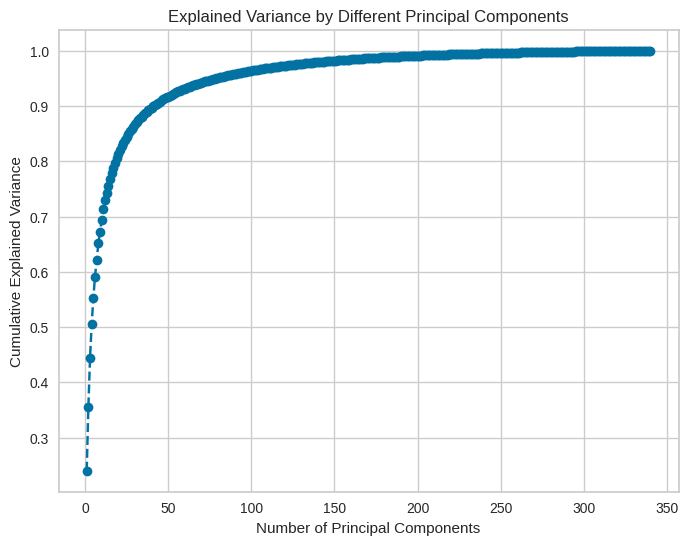

In [ ]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()

## **Implement Algorithms**

In [ ]:
def LDA_dimension_reduction(df_final):
    # Separate features and labels
    X = df_final.drop('target', axis=1)
    y = df_final['target'].values

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    X_train_photos = X_train['2609']
    X_test_photos = X_test['2609']

    X_train = X_train.drop('2609', axis=1).values
    X_test = X_test.drop('2609', axis=1).values

    # Initialize the LDA model
    lda = LinearDiscriminantAnalysis(n_components=None)  # None means LDA will infer the number of components automatically

    # Fit the LDA model
    lda.fit(X_train, y_train)

    # Transform the training and testing sets
    X_train_lda = lda.transform(X_train)
    X_test_lda = lda.transform(X_test)

    return X_train_lda, X_test_lda, y_train, y_test, X_train_photos, X_test_photos

In [ ]:
def PCA_dimension_reduction(df_final, n_c=150):
    # Separate features and labels
    X = df_final.drop(columns=['target', '2609'])
    y = df_final['target'].values
    X_photos = df_final['2609']

    # Fit PCA to the data
    pca = PCA(n_components=n_c)
    X_pca = pca.fit_transform(X)

    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=X_pca)
    pca_df['photo'] = X_photos

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.25)

    X_train_photos = X_train['photo']
    X_test_photos = X_test['photo']

    X_train = X_train.drop('photo', axis=1).values
    X_test = X_test.drop('photo', axis=1).values

    return X_train, X_test, y_train, y_test, X_train_photos, X_test_photos

# **Clustering**

In [ ]:
# Separate features and labels
X = df_train.drop(columns=['target', '2609'])
y = df_train['target'].values
X_photos = df_train['2609'].values

# Fit PCA to the data
pca = PCA(n_components=150)
X_pca = pca.fit_transform(X)

In [ ]:
X

1       2        3        4        5         6         7         8  \
0    0.72694  1.4742  0.32396  0.98535  1.00000  0.835920  0.004657  0.003947   
1    0.74173  1.5257  0.36116  0.98152  0.99825  0.798670  0.005242  0.005002   
2    0.76722  1.5725  0.38998  0.97755  1.00000  0.808120  0.007457  0.010121   
3    0.73797  1.4597  0.35376  0.97566  1.00000  0.816970  0.006877  0.008607   
4    0.82301  1.7707  0.44462  0.97698  1.00000  0.754930  0.007428  0.010042   
..       ...     ...      ...      ...      ...       ...       ...       ...   
335  0.37522  1.1417  0.81725  0.68511  0.58772  0.125230  0.091860  1.535800   
336  0.28064  1.0849  0.75319  0.72152  0.71404  0.136860  0.078996  1.135800   
337  0.35344  1.0329  0.78147  0.70737  0.61579  0.135030  0.089763  1.466400   
338  0.59988  1.1427  0.71532  0.66101  0.47544  0.157470  0.113370  2.339400   
339  0.47195  1.0901  0.85409  0.53598  0.39649  0.078376  0.132270  3.184000   

            9        10  ...      2599  2600  2601      2602      2603  \
0    0.047790  0.127950  ...  0.007673   0.0   0.0  0.000302  0.047924   
1    0.024160  0.090476  ...  0.010732   0.0   0.0  0.000347  0.035323   
2    0.011897  0.057445  ...  0.003663   0.0   0.0  0.002724  0.042494   
3    0.015950  0.065491  ...  0.001196   0.0   0.0  0.016061  0.046267   
4    0.007938  0.045339  ...  0.000348   0.0   0.0  0.007007  0.024181   
..        ...       ...  ...       ...   ...   ...       ...       ...   
335  0.114880  0.208610  ...  0.000000   0.0   0.0  0.000258  0.006332   
336  0.141220  0.218300  ...  0.000000   0.0   0.0  0.000182  0.007216   
337  0.097663  0.207030  ...  0.000000   0.0   0.0  0.000212  0.007328   
338  0.050389  0.135850  ...  0.000000   0.0   0.0  0.003116  0.009857   
339  0.082007  0.187820  ...  0.000039   0.0   0.0  0.001479  0.024808   

         2604      2605      2606      2607      2608  
0    0.093215  0.014512  0.011357  0.023729  0.994038  
1    0.041192  0.007870  0.009124  0.062162  0.996517  
2    0.006809  0.005030  0.003446  0.152830  0.987292  
3    0.007989  0.006813  0.006977  0.104655  0.993222  
4    0.004408  0.002828  0.004153  0.060365  0.997837  
..        ...       ...       ...       ...       ...  
335  0.089712  0.248005  0.082607  0.230372  0.933011  
336  0.119102  0.337698  0.052663  0.135247  0.922311  
337  0.043223  0.187618  0.265604  0.940853  0.084428  
338  0.120015  0.069171  0.035060  0.275599  0.950537  
339  0.095216  0.204124  0.147789  0.755090  0.597200  

[340 rows x 2608 columns]

In [ ]:
X_pca.shape

(340, 150)

In [ ]:
X_photos

array(['./drive/MyDrive/leaves/1/iPAD2_C01_EX01.JPG',
       './drive/MyDrive/leaves/1/iPAD2_C01_EX02.JPG',
       './drive/MyDrive/leaves/1/iPAD2_C01_EX03.JPG',
       './drive/MyDrive/leaves/1/iPAD2_C01_EX04.JPG',
       './drive/MyDrive/leaves/1/iPAD2_C01_EX05.JPG',
       './drive/MyDrive/leaves/1/iPAD2_C01_EX06.JPG',
       './drive/MyDrive/leaves/1/iPAD2_C01_EX07.JPG',
       './drive/MyDrive/leaves/1/iPAD2_C01_EX08.JPG',
       './drive/MyDrive/leaves/1/iPAD2_C01_EX09.JPG',
       './drive/MyDrive/leaves/1/iPAD2_C01_EX10.JPG',
       './drive/MyDrive/leaves/1/iPAD2_C01_EX11.JPG',
       './drive/MyDrive/leaves/1/iPAD2_C01_EX12.JPG',
       './drive/MyDrive/leaves/2/iPAD2_C02_EX01.JPG',
       './drive/MyDrive/leaves/2/iPAD2_C02_EX02.JPG',
       './drive/MyDrive/leaves/2/iPAD2_C02_EX03.JPG',
       './drive/MyDrive/leaves/2/iPAD2_C02_EX04.JPG',
       './drive/MyDrive/leaves/2/iPAD2_C02_EX05.JPG',
       './drive/MyDrive/leaves/2/iPAD2_C02_EX06.JPG',
       './drive/MyDrive/leav

In [ ]:
def clustering_metrics(X_pca, y, labels):
  silhouette = silhouette_score(X_pca, labels)
  mi = mutual_info_score(y, labels)
  nmi = normalized_mutual_info_score(y, labels)

  print(f"Silhouette Score: {silhouette:.2f}")
  print(f"Mutual Information (MI): {mi:.2f}")
  print(f"Normal Mutual Information (NMI): {nmi:.2f}")

In [ ]:
def show_images_in_cluster_and_class(index, model_labels, y, X_photos):
    # Find the cluster label for the given index
    cluster_label = model_labels[index]

    # Find the real class for the given index
    real_class = y[index]

    # Find all indices with the same cluster label
    indices_in_cluster = np.where(model_labels == cluster_label)[0]

    # Find all indices with the same real class
    indices_in_class = np.where(y == real_class)[0]

    # Number of images in the cluster
    num_images_cluster = len(indices_in_cluster)

    # Number of images in the real class
    num_images_class = len(indices_in_class)

    # Number of columns for the grid
    n_cols = 8

    # Calculate the number of rows needed
    n_rows_cluster = (num_images_cluster + n_cols - 1) // n_cols
    n_rows_class = (num_images_class + n_cols - 1) // n_cols

    print('Photo in cluster')
    # Create the subplots for the cluster images
    fig, axes = plt.subplots(n_rows_cluster, n_cols, figsize=(20, n_rows_cluster * 5))
    axes = axes.flatten()
    for i, idx in enumerate(indices_in_cluster):
        img_path = X_photos[idx]
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f'Cluster Index: {idx}')
        axes[i].axis('off')
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

    print('--------------------------------------------------------------------------------------------------------')

    print("Photo in real class")
    # Create the subplots for the real class images
    fig, axes = plt.subplots(n_rows_class, n_cols, figsize=(20, n_rows_class * 5))
    axes = axes.flatten()
    for i, idx in enumerate(indices_in_class):
        img_path = X_photos[idx]
        img = mpimg.imread(img_path)
        axes[i].imshow(img)
        axes[i].set_title(f'Real Class Index: {idx}')
        axes[i].axis('off')
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()


## **K-Means**

In [ ]:
# define the model
model = KMeans(n_clusters=30)
# assign a cluster to each example
model.fit(X_pca)

KMeans(n_clusters=30)

In [ ]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26

In [ ]:
model.labels_

array([21, 21, 26, 26, 26, 26, 26, 21, 26, 26, 26, 26,  8,  8,  8,  8,  8,
        8, 26,  8,  8, 14, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 14, 14,
       14, 14, 14, 14, 14, 14, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 25, 25, 25, 25, 25, 25, 25, 25, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 11, 11, 11, 11,
       11, 11, 12, 26, 11, 11, 11, 11, 11, 12, 11, 11, 11, 11, 11, 15, 15,
       15, 15, 15, 15, 15, 15,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       14, 14, 14, 26, 14, 14, 21, 14, 14, 14, 14, 14, 14,  8,  8, 14,  8,
       14,  8, 20, 12,  8, 14, 14, 14, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 14, 21, 21, 21, 21, 14, 21, 26, 21, 14,
       21, 21, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0, 27, 27, 27, 18, 27,
       27, 18, 27, 27, 27

Photo in cluster


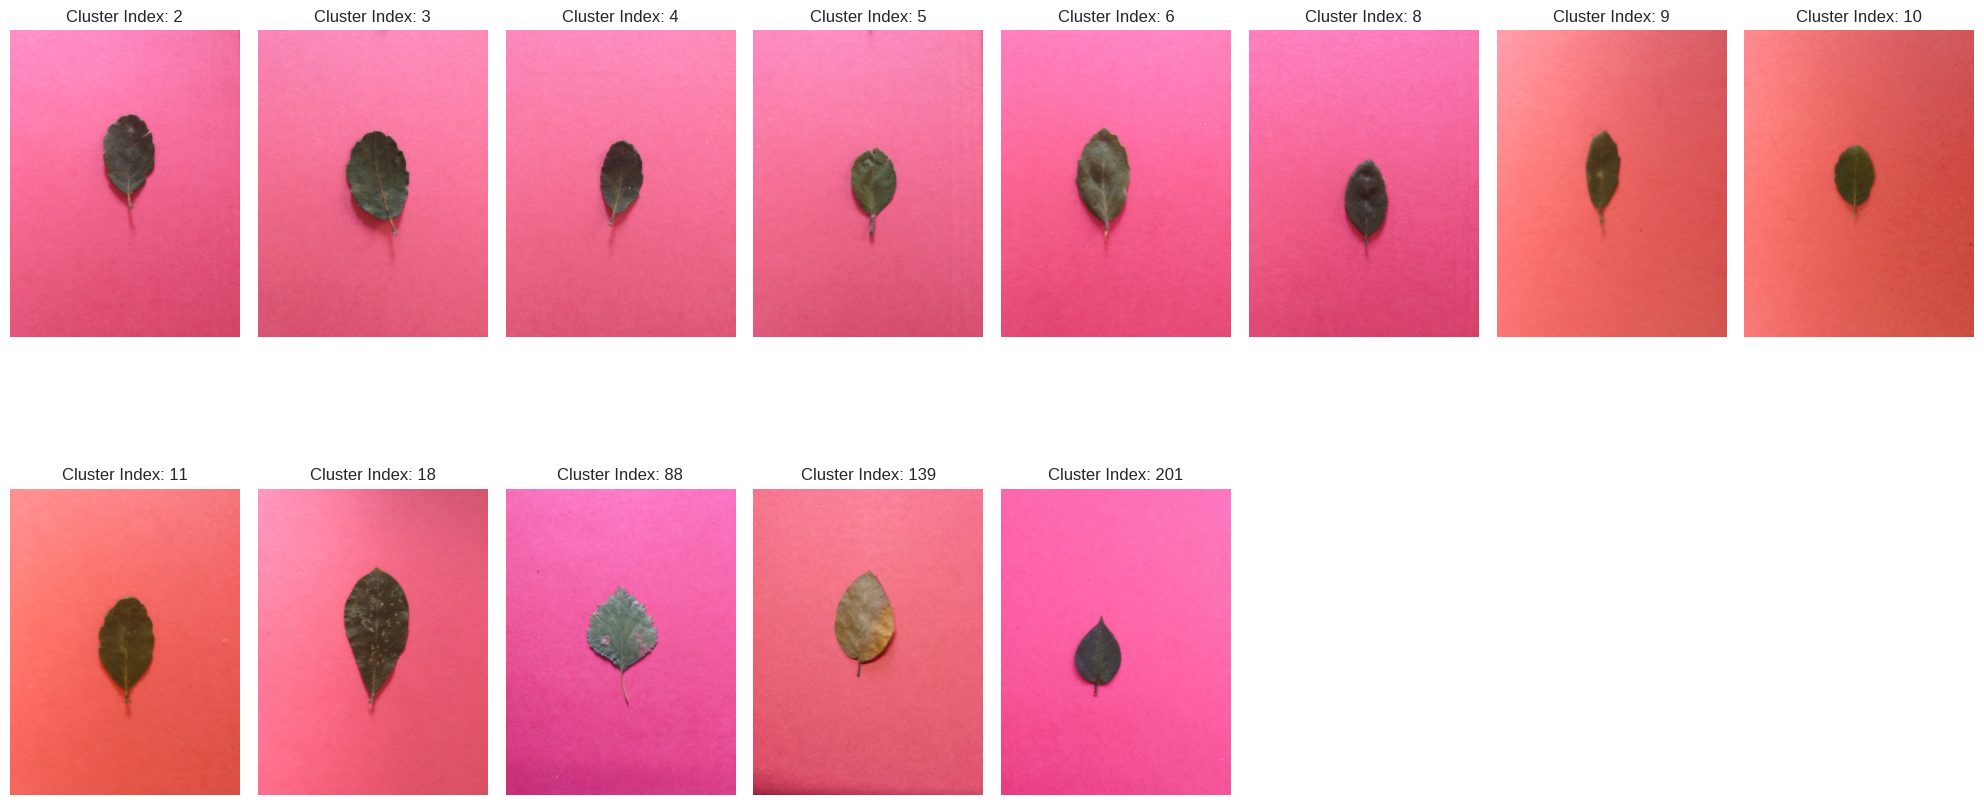

--------------------------------------------------------------------------------------------------------
Photo in real class


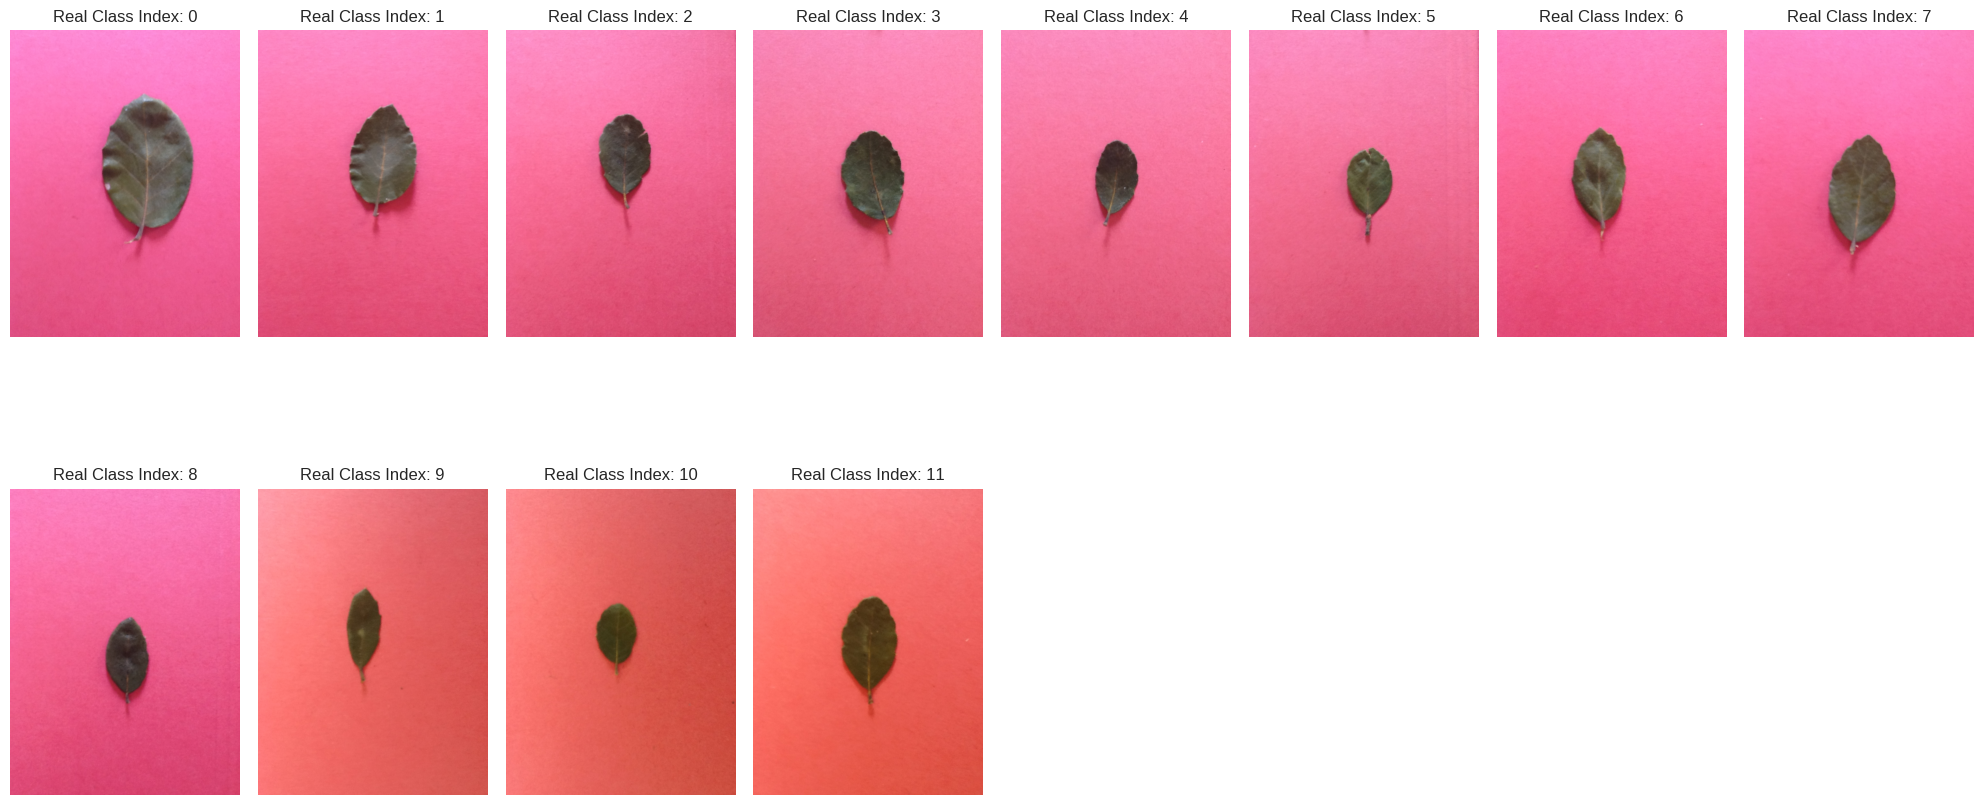

In [ ]:
show_images_in_cluster_and_class(5, model.labels_, y, X_photos)

In [ ]:
clustering_metrics(X_pca, y, model.labels_)

Silhouette Score: 0.35
Mutual Information (MI): 2.91
Normal Mutual Information (NMI): 0.87


## **Spectral Clustering**

In [ ]:
# define the model
model = SpectralClustering(n_clusters=30)
# fit model and predict clusters
model.fit(X_pca)

SpectralClustering(n_clusters=30)

In [ ]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26

In [ ]:
model.labels_

array([13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 13, 13,
       13, 13, 13, 13, 13, 13, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  9,  9,  9,  9,  9,  9,  9,  9, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 27, 27, 21,
       27, 27,  3, 26, 27, 27, 27, 27, 27,  3,  6,  6,  6,  6,  6, 12, 12,
       12, 12, 12, 12, 12, 12, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 21, 21, 10, 21,
       24, 21, 10, 28, 21, 10, 10, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 20, 20, 20, 20, 20, 20, 20, 20, 13, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13,  4, 19,  4, 14, 14, 14, 14, 14,  4, 25, 25, 25, 25, 25,
       25, 25, 25, 25, 25

In [ ]:
clustering_metrics(X_pca, y, model.labels_)

Silhouette Score: 0.17
Mutual Information (MI): 2.62
Normal Mutual Information (NMI): 0.83


## **Gaussian Mixture**

In [ ]:
# define the model
model = GaussianMixture(n_components=30)
# fit model and predict clusters
yhat = model.fit_predict(X_pca)
# retrieve unique clusters
clusters = np.unique(yhat)

In [ ]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26,
       26, 26, 26, 26, 26

In [ ]:
yhat

array([ 3, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 10, 10, 10, 10, 10,
       10, 26, 10, 10, 27,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 27, 27,
       27, 27, 27, 27, 27, 27,  9,  9, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 21, 21, 21, 21, 21, 21, 21, 21, 19, 19, 19, 19, 19, 19, 19, 26,
       19, 19, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16,
       16, 16,  5, 16, 16, 16, 16, 16, 16,  5, 17, 17, 16, 17, 16, 17, 17,
       17, 17, 17, 17, 17, 17,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5, 24,  5,  5,
       27, 27, 27, 20, 27, 27, 27, 27, 27, 27, 27, 27, 27, 10, 10, 24, 10,
       24, 10, 24, 24, 10, 24, 24, 24,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8, 27,  3,  3,  3,  3, 27,  3, 26,  3,  3,
        3,  3,  3, 14, 14, 14, 14, 14, 14, 14, 14, 14, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23

In [ ]:
clustering_metrics(X_pca, y, yhat)

Silhouette Score: 0.33
Mutual Information (MI): 2.99
Normal Mutual Information (NMI): 0.90


#**Classification**

## **Analysis Model with Pycaret**

In [ ]:
X_train, X_test, y_train, y_test, X_train_photos, X_test_photos = PCA_dimension_reduction(df_train)

In [ ]:
# Combine training data
train_data = pd.DataFrame(X_train)
train_data['target'] = y_train

In [ ]:
# Combine testing data
test_data = pd.DataFrame(X_test)
test_data['target'] = y_test

In [ ]:
# Combine both into a single DataFrame
combined_data = pd.concat([train_data, test_data], axis=0)

In [ ]:
# Reset the index of the DataFrame
combined_data = combined_data.reset_index(drop=True)

In [ ]:
combined_data

0         1         2         3         4         5         6  \
0   -0.160947 -0.701863 -2.519965  0.500192 -1.090782 -0.980914 -0.088147   
1    0.023420 -0.628518 -2.567263 -1.267372  1.185011  0.973273  1.522227   
2   -2.094779  0.544205 -0.338404 -3.290231  2.192346 -0.414067 -0.567771   
3   -3.416319 -1.120312  3.018802  0.179268 -0.347457 -1.642491 -2.652717   
4   -3.651026 -1.551495  2.267103 -0.746192  1.940664 -1.599041  0.196744   
..        ...       ...       ...       ...       ...       ...       ...   
335 -0.078076 -1.358005 -0.817766  1.409590  0.105138  1.411638 -2.251602   
336  0.982895  0.649406 -2.410866 -0.622664  2.688651  1.158447 -2.501394   
337 -1.516927 -1.045672 -2.130988 -0.379744 -2.094292  0.184693  0.224075   
338 -3.658858  0.486674  3.460066  1.972542  1.535103  0.611723 -0.243927   
339 -3.190539 -0.891720 -0.470171 -1.900125 -1.685228  0.401070  0.714665   

            7         8         9  ...       141       142       143  \
0    0.238510 -0.307124 -0.508761  ...  0.083435  0.053906 -0.209378   
1   -0.705363 -0.885806  1.609848  ...  0.189282 -0.186373  0.026637   
2    0.419233 -1.071123  0.290899  ...  0.041626 -0.079698 -0.013607   
3    0.253330 -0.810667  0.653393  ... -0.272067  0.113523 -0.076154   
4    0.516257 -0.631016 -0.014519  ... -0.122596  0.065287  0.066814   
..        ...       ...       ...  ...       ...       ...       ...   
335 -1.733587 -1.241201  2.837810  ... -0.074758 -0.213370  0.086524   
336  0.126131  0.050497  2.071033  ... -0.068746  0.127217  0.040392   
337  0.108660 -0.866708  0.553514  ...  0.047373  0.042429 -0.051168   
338 -0.055663 -2.281233 -2.062206  ...  0.052559 -0.080357 -0.097824   
339 -0.425783  2.033879  0.683971  ...  0.080899 -0.089796 -0.168434   

          144       145       146       147       148       149  target  
0    0.068696 -0.003150 -0.051408 -0.051214 -0.184178 -0.069253       1  
1    0.111668  0.111472  0.043350 -0.108849  0.116954  0.082012      28  
2   -0.075289  0.131191  0.137603 -0.049868 -0.162658 -0.066435       9  
3   -0.021520  0.138888 -0.032403  0.006236 -0.120506 -0.011883       9  
4    0.065251 -0.265690 -0.088907  0.059533 -0.050655  0.056082       9  
..        ...       ...       ...       ...       ...       ...     ...  
335  0.063931 -0.040302  0.008022 -0.163912  0.121104 -0.044819       7  
336 -0.042736 -0.080994 -0.127498  0.098249  0.023543 -0.006644       7  
337  0.087776 -0.106984  0.028053  0.023835  0.109119 -0.188265      24  
338 -0.049326  0.006264 -0.082622  0.287562  0.012141  0.200661      15  
339  0.086078 -0.148523  0.082370  0.026761 -0.126397  0.142142      26  

[340 rows x 151 columns]

In [ ]:
# Initialize the setup
clf_setup = setup(data=combined_data, target='target')

In [ ]:
# Compare models and select the best one
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
X_train, X_test, y_train, y_test, X_train_photos, X_test_photos = LDA_dimension_reduction(df_train)

In [ ]:
# Combine training data
train_data = pd.DataFrame(X_train)
train_data['target'] = y_train

In [ ]:
# Combine testing data
test_data = pd.DataFrame(X_test)
test_data['target'] = y_test

In [ ]:
# Combine both into a single DataFrame
combined_data = pd.concat([train_data, test_data], axis=0)

In [ ]:
# Reset the index of the DataFrame
combined_data = combined_data.reset_index(drop=True)

In [ ]:
combined_data

0         1         2         3         4         5         6  \
0   -5.422113  4.505263 -2.357675  1.174941 -1.578897  3.259893  4.163903   
1   -3.335598 -0.756788 -4.867275  6.012802 -1.633526 -1.663985 -2.600779   
2   -3.335207  3.737185 -4.740781  0.279635 -1.825602  1.379901 -6.813959   
3   -0.537027  4.168340  7.431057 -3.994439 -4.448696 -1.368693 -2.181849   
4   -4.733528  0.220989 -2.386252  1.332120 -0.112802  1.662271  0.398519   
..        ...       ...       ...       ...       ...       ...       ...   
335 -2.286715  2.388023 -2.379810 -4.429550  1.466239  2.287447  1.060502   
336 -1.615875  3.795674 -1.380162 -5.662284  1.636256 -0.206584  3.675049   
337 -3.759644 -0.480668 -4.220795  5.084497 -3.022200 -1.521603 -2.951754   
338 -4.556027 -0.627924 -4.672823  2.889494 -3.204340  0.644533  1.126413   
339 -5.470301  4.342932 -4.547498  2.933832 -4.388252  5.623501  0.577479   

            7         8         9  ...        20        21        22  \
0    3.827091  3.432257 -0.056303  ... -2.581689  1.745655  1.526918   
1    6.806192  3.638254 -1.325177  ... -0.634516  1.563887 -1.941761   
2   -0.488332 -1.618177 -2.769690  ... -4.373654 -4.033934 -0.861921   
3   -0.683270 -3.944107  0.186346  ... -1.301945  3.106562 -1.045138   
4    2.757627  0.993310  7.006598  ... -5.705914  1.265916  5.291752   
..        ...       ...       ...  ...       ...       ...       ...   
335 -2.754633  1.281583  4.124494  ... -0.122642  3.502651 -2.150414   
336 -2.973728  1.845953  4.446684  ...  0.818091  1.977362 -2.190286   
337  6.746606  3.792927 -1.789945  ... -1.662805  1.166258 -2.601595   
338  0.688499 -0.153858  4.050167  ...  0.179413 -0.890820  2.963392   
339 -0.635377  5.436982 -1.287000  ...  1.489619  0.076920 -3.340981   

           23        24        25        26        27        28  target  
0    0.097291 -6.767833 -1.224890  1.059584  0.227891 -1.700197      26  
1    1.695734  4.446599 -1.711639 -1.347537 -1.058747 -1.407424      29  
2    2.441563  0.259775  4.299145  1.757889 -0.571349  1.569880       1  
3    0.655864  1.719325  1.157176  1.987417 -0.218422 -1.057356       3  
4   -1.416581  4.511301  3.248207  2.089765  0.301545 -1.135402      22  
..        ...       ...       ...       ...       ...       ...     ...  
335  1.131526 -0.311033  0.304668 -3.837988 -0.708201  2.224020      14  
336  1.316968  2.013432  0.225479 -3.699187 -1.757921  3.202670      14  
337  2.421144 -0.110999 -1.012639 -0.887705 -2.331392 -0.589756      29  
338 -0.705024  1.056481 -0.851130 -0.884166  6.191213  2.939608      32  
339  1.410832 -0.284757  0.210171  0.821528 -1.088378 -0.774039      33  

[340 rows x 30 columns]

In [ ]:
# Initialize the setup
clf_setup = setup(data=combined_data, target='target')

In [ ]:
# Compare models and select the best one
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## **Implement Models and Analysis Methods**

In [ ]:
def logistic_regresion_model(X_train, X_test, y_train):
    # Create and fit the Logistic Regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = log_reg.predict(X_test)

    return log_reg, y_pred

In [ ]:
def LDA_model(X_train, X_test, y_train):
    # Train a classifier on the transformed training set
    # For simplicity, let's use LDA itself as the classifier
    lda_classifier = LinearDiscriminantAnalysis()
    lda_classifier.fit(X_train, y_train)

    # Predict on the transformed test set
    y_pred = lda_classifier.predict(X_test)

    return lda_classifier, y_pred

In [ ]:
def extra_trees_model(X_train, X_test, y_train):
  # Create and fit the Extra Trees Classifier model
  extra_trees_clf = ExtraTreesClassifier(random_state=42)
  extra_trees_clf.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = extra_trees_clf.predict(X_test)

  return extra_trees_clf, y_pred

In [ ]:
def ridge_model(X_train, X_test, y_train):
  # Create and fit the Ridge Classifier model
  ridge_clf = RidgeClassifier()
  ridge_clf.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = ridge_clf.predict(X_test)

  return ridge_clf, y_pred

In [ ]:
def KNN_model(X_train, X_test, y_train, K):
  # Create and fit the Extra Trees Classifier model
  KNN_clf = KNeighborsClassifier(n_neighbors=K)
  KNN_clf.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = KNN_clf.predict(X_test)

  return KNN_clf, y_pred

In [ ]:
def display_images_from_directory(directory_path, images_per_row=5):
    # Get all image file paths from the directory
    image_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith(('png', 'JPG', 'jpeg', 'gif', 'bmp'))]

    # Number of images
    n_images = len(image_files)

    # Calculate the number of rows needed
    n_rows = (n_images + images_per_row - 1) // images_per_row

    # Create a figure with the appropriate number of subplots
    fig, axes = plt.subplots(n_rows, images_per_row, figsize=(images_per_row * 3, n_rows * 3))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < n_images:
            img = Image.open(image_files[i])
            ax.imshow(img)
            ax.axis('off')  # Hide the axes
        else:
            ax.axis('off')  # Hide the axes for empty subplots

    plt.tight_layout()
    plt.show()


In [ ]:
def show_result(accuracy_scores):
  # Calculate statistical measures
  average_accuracy = np.mean(accuracy_scores)
  variance_accuracy = np.var(accuracy_scores)
  max_accuracy = np.max(accuracy_scores)
  min_accuracy = np.min(accuracy_scores)
  std_dev_accuracy = np.std(accuracy_scores)

  # Print the statistical measures
  print(f'Average Accuracy: {average_accuracy * 100:.2f}%')
  print(f'Variance: {variance_accuracy:.4f}')
  print(f'Max Accuracy: {max_accuracy * 100:.2f}%')
  print(f'Min Accuracy: {min_accuracy * 100:.2f}%')
  print(f'Standard Deviation: {std_dev_accuracy:.4f}')

  # Plot the continuous distribution of accuracy scores
  plt.figure(figsize=(10, 6))
  sns.kdeplot(accuracy_scores, shade=True)
  plt.title('Continuous Distribution of Accuracy Scores over 50 Iterations')
  plt.xlabel('Accuracy')
  plt.ylabel('Density')
  plt.grid(True)
  plt.show()

  return average_accuracy, std_dev_accuracy

In [ ]:
def mistake_analysis(y_pred, y_test, path):
  print(f'True Label = {y_test}')
  print(f'Predict Label = {y_pred}')

  true_dir = base_adr + f'leaves/{y_test}'
  pred_dir = base_adr + f'leaves/{y_pred}'

  print('------------------------------------------------')

  # Open the image using Pillow
  img = Image.open(path)
  # Display the image using Matplotlib
  plt.imshow(img)
  plt.axis('off')  # Hide the axis
  plt.show()


  print('------------------------------------------------')

  print('True Class Images:')
  display_images_from_directory(true_dir, 7)

  print('------------------------------------------------')
  print('Predict Class Images:')
  display_images_from_directory(pred_dir, 7)

  print('************************************************')

In [ ]:
def model_analysis(dimension_reduction, classifier, df_train, iteration, mis_analysis=False):
  ans = 0.0
  accuracy_scores = []

  for itr in range(iteration):
    if dimension_reduction == 'LDA':
      X_train, X_test, y_train, y_test, X_train_photos, X_test_photos = LDA_dimension_reduction(df_train)
    elif dimension_reduction == 'PCA':
      X_train, X_test, y_train, y_test, X_train_photos, X_test_photos = PCA_dimension_reduction(df_train)


    if classifier == "KNN":
      Ks = [3, 5, 7]
      K = random.randint(0, 2)
      model, y_pred = KNN_model(X_train, X_test, y_train, Ks[K])
    elif classifier == "ridge":
      model, y_pred = ridge_model(X_train, X_test, y_train)
    elif classifier == "logistic_regresion":
      model, y_pred = logistic_regresion_model(X_train, X_test, y_train)
    elif classifier == "LDA":
      model, y_pred = LDA_model(X_train, X_test, y_train)
    elif classifier == "extra_trees":
      model, y_pred = extra_trees_model(X_train, X_test, y_train)

    accuracy_scores.append(accuracy_score(y_pred, y_test))

    if mis_analysis:
      for i in range(len(y_pred)):
        if y_pred[i] != y_test[i]:
          mistake_analysis(y_pred[i], y_test[i], X_test_photos.iloc[i])

  return show_result(accuracy_scores)

##**Model Analysis with PCA**

In [ ]:
acc_std_model = {}

Average Accuracy: 97.36%
Variance: 0.0003
Max Accuracy: 100.00%
Min Accuracy: 92.94%
Standard Deviation: 0.0180


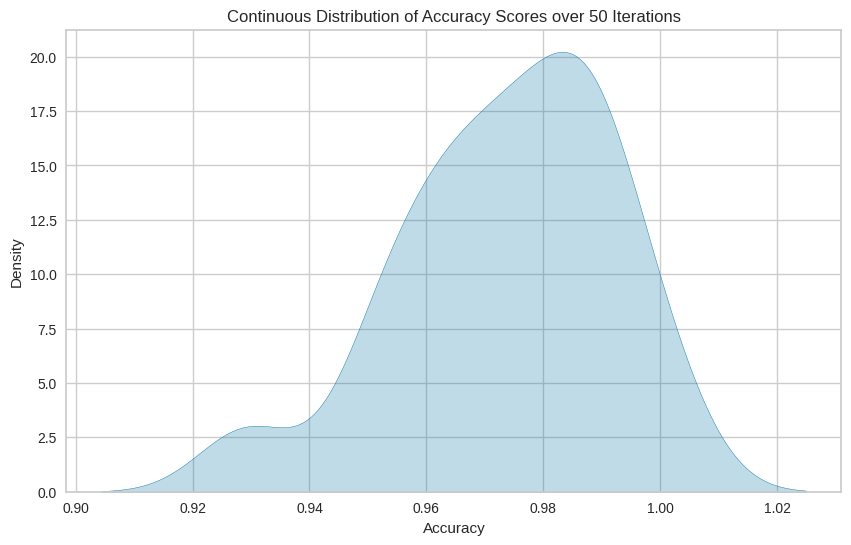

In [ ]:
acc_std_model['LR_PCA'] = model_analysis('PCA', 'logistic_regresion', df_train, 50)

Average Accuracy: 98.07%
Variance: 0.0003
Max Accuracy: 100.00%
Min Accuracy: 92.94%
Standard Deviation: 0.0163


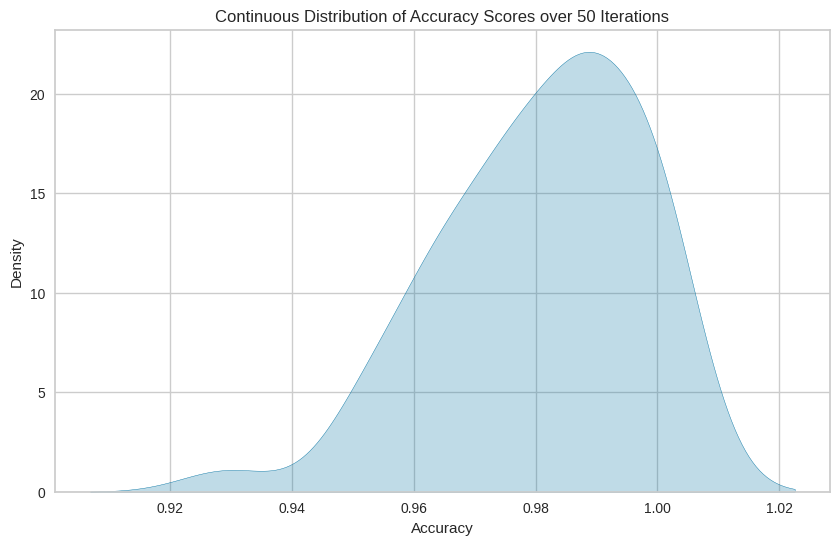

In [ ]:
acc_std_model['LDA_PCA'] = model_analysis('PCA', 'LDA', df_train, 50)

Average Accuracy: 98.92%
Variance: 0.0001
Max Accuracy: 100.00%
Min Accuracy: 96.47%
Standard Deviation: 0.0091


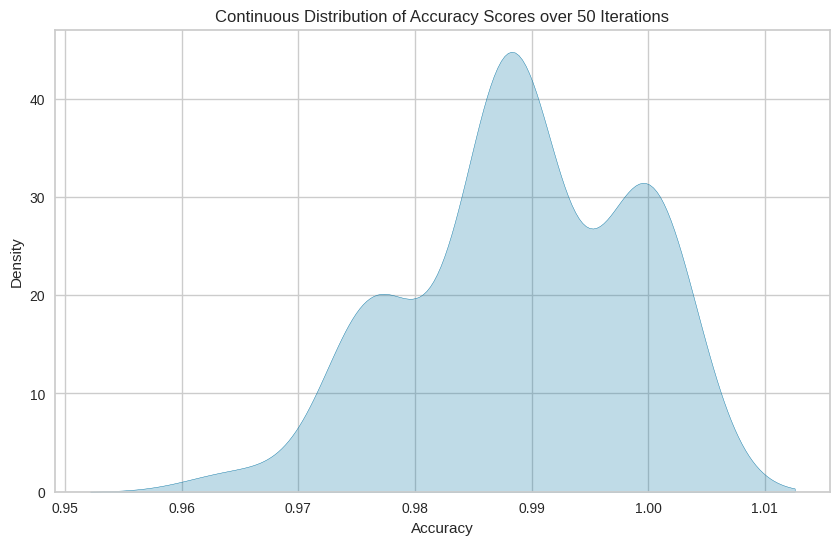

In [ ]:
acc_std_model['ridge_PCA'] = model_analysis('PCA', 'ridge', df_train, 50)

Average Accuracy: 91.27%
Variance: 0.0008
Max Accuracy: 96.47%
Min Accuracy: 85.88%
Standard Deviation: 0.0277


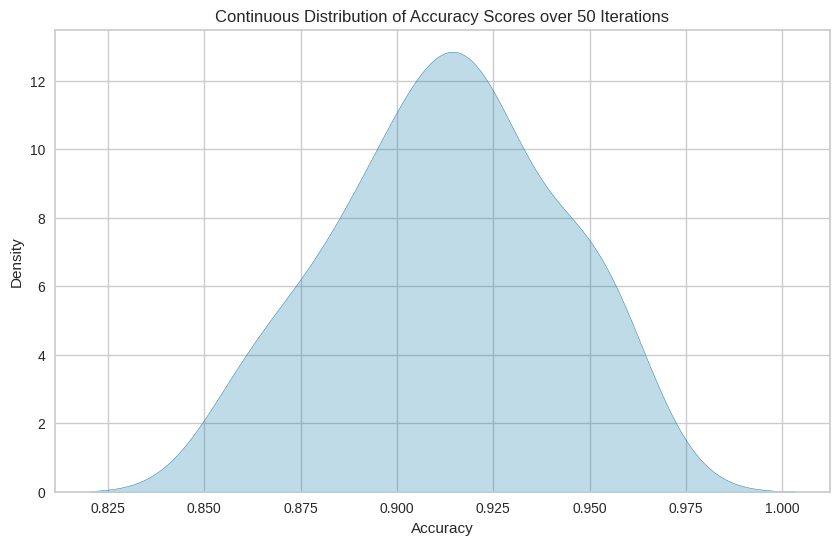

In [ ]:
acc_std_model['KNN_PCA'] = model_analysis('PCA', 'KNN', df_train, 50)

Average Accuracy: 94.21%
Variance: 0.0008
Max Accuracy: 98.82%
Min Accuracy: 85.88%
Standard Deviation: 0.0285


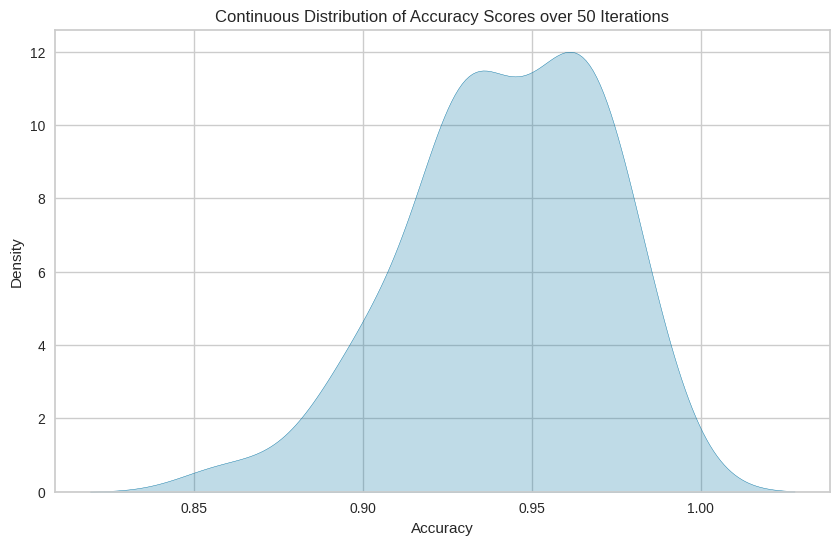

In [ ]:
acc_std_model['ET_PCA'] = model_analysis('PCA', 'extra_trees', df_train, 50)

##**Model Analysis with LDA**

Average Accuracy: 98.87%
Variance: 0.0001
Max Accuracy: 100.00%
Min Accuracy: 96.47%
Standard Deviation: 0.0094


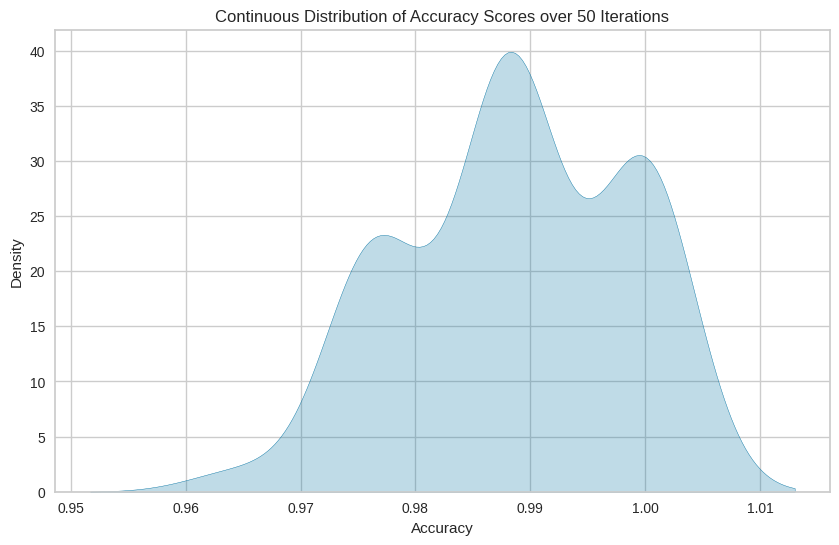

In [ ]:
acc_std_model['LR_LDA'] = model_analysis('LDA', 'logistic_regresion', df_train, 50)

Average Accuracy: 98.21%
Variance: 0.0001
Max Accuracy: 100.00%
Min Accuracy: 95.29%
Standard Deviation: 0.0106


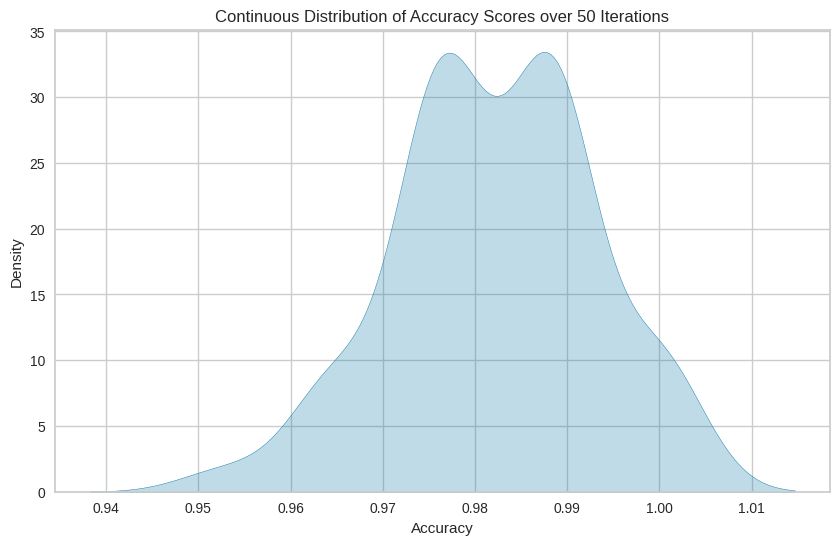

In [ ]:
acc_std_model['LDA_LDA'] = model_analysis('LDA', 'LDA', df_train, 50)

Average Accuracy: 98.33%
Variance: 0.0003
Max Accuracy: 100.00%
Min Accuracy: 88.24%
Standard Deviation: 0.0185


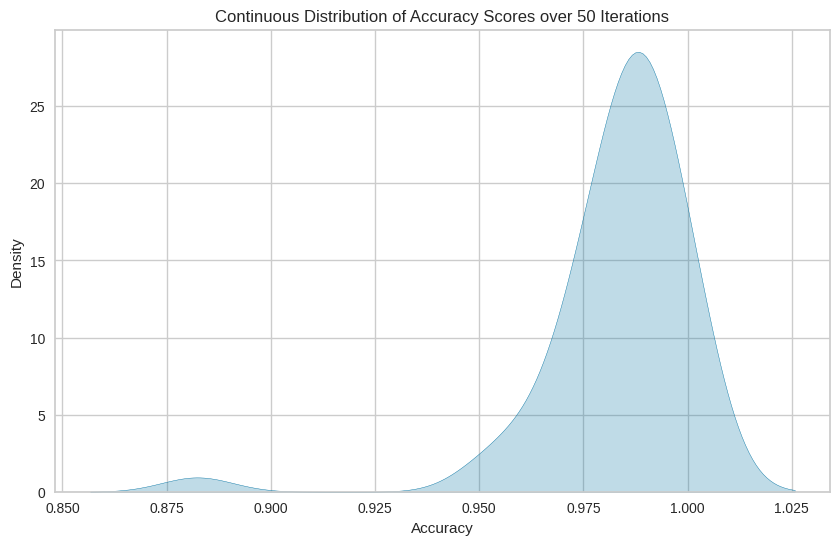

In [ ]:
acc_std_model['ridge_LDA'] = model_analysis('LDA', 'ridge', df_train, 50)

Average Accuracy: 98.05%
Variance: 0.0002
Max Accuracy: 100.00%
Min Accuracy: 94.12%
Standard Deviation: 0.0142


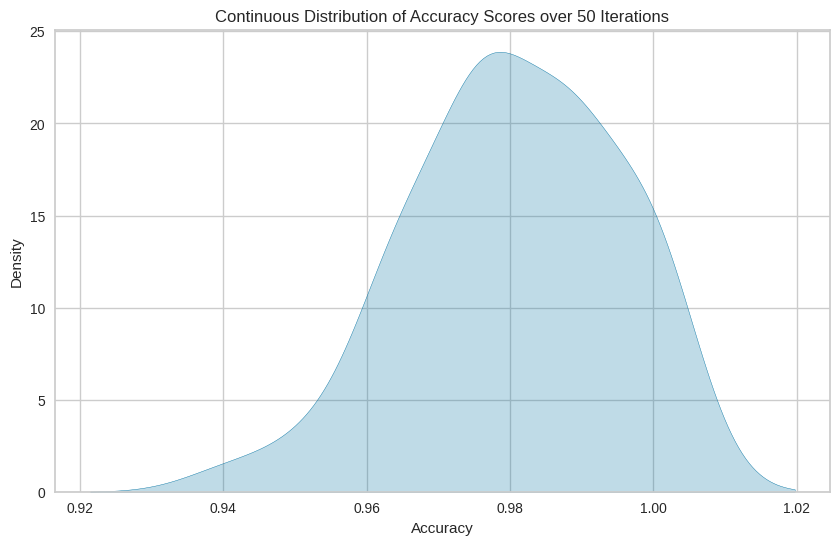

In [ ]:
acc_std_model['KNN_LDA'] = model_analysis('LDA', 'KNN', df_train, 50)

Average Accuracy: 97.34%
Variance: 0.0003
Max Accuracy: 100.00%
Min Accuracy: 90.59%
Standard Deviation: 0.0173


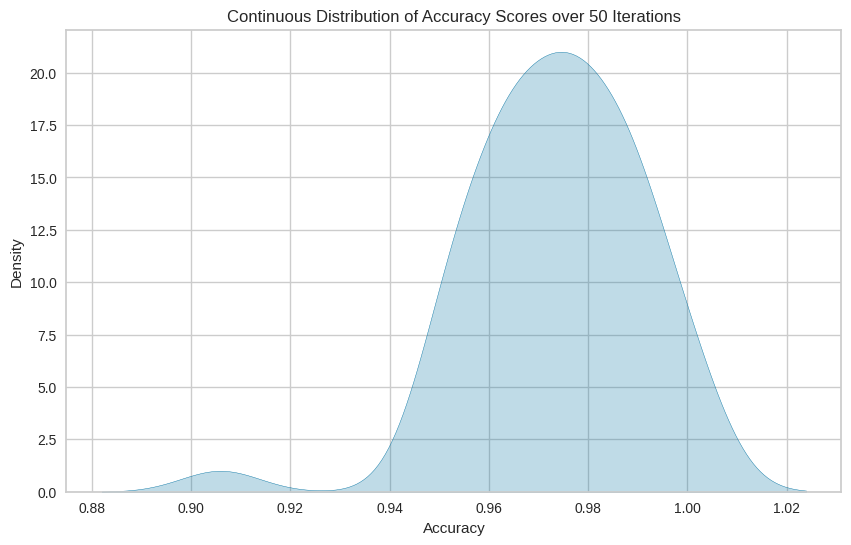

In [ ]:
acc_std_model['ET_LDA'] = model_analysis('LDA', 'extra_trees', df_train, 50)

## **Result**

In [ ]:
acc_std_model

{'LR_PCA': (0.9736470588235295, 0.018005766089137884),
 'LDA_PCA': (0.9807058823529411, 0.016260849452396243),
 'ridge_PCA': (0.9891764705882353, 0.009064169545533286),
 'KNN_PCA': (0.9127058823529411, 0.027749746717881482),
 'ET_PCA': (0.9421176470588235, 0.028512366041790325),
 'LR_LDA': (0.9887058823529411, 0.009399992637853268),
 'LDA_LDA': (0.9821176470588235, 0.010585620592190127),
 'ridge_LDA': (0.9832941176470587, 0.018540519546439458),
 'KNN_LDA': (0.9804705882352942, 0.014236752477558453),
 'ET_LDA': (0.9734117647058824, 0.017260070527146655)}

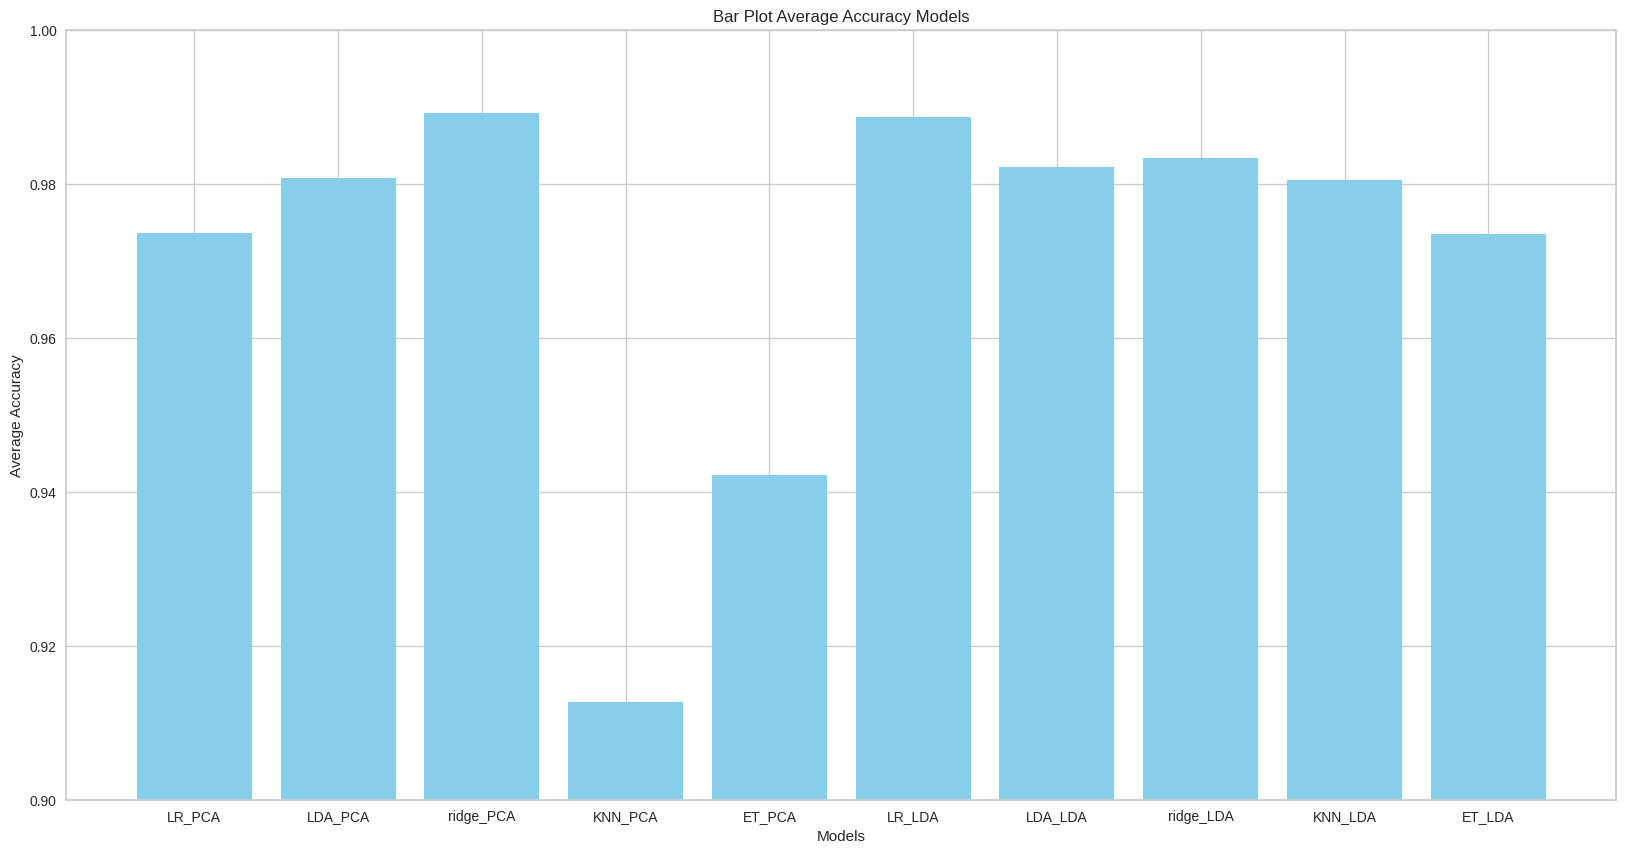

In [ ]:
keys = list(acc_std_model.keys())
values = [val[0] for val in acc_std_model.values()]

plt.figure(figsize=(20, 10))
plt.bar(keys, values, color='skyblue')

plt.title('Bar Plot Average Accuracy Models')
plt.xlabel('Models')
plt.ylabel('Average Accuracy')

plt.ylim(0.9, 1)

plt.show()

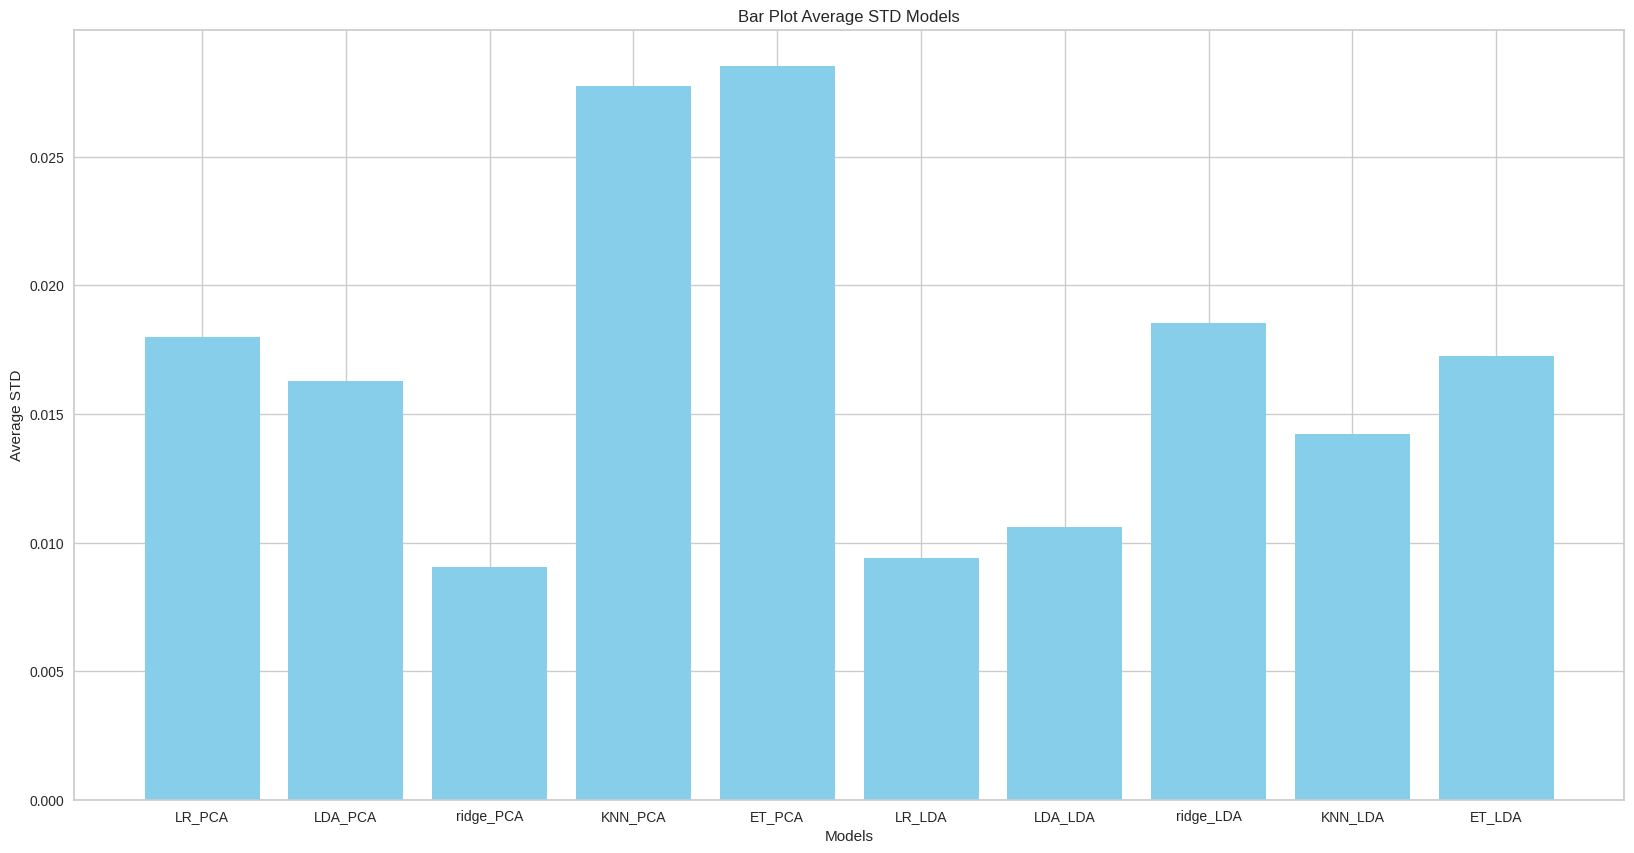

In [ ]:
keys = list(acc_std_model.keys())
values = [val[1] for val in acc_std_model.values()]

plt.figure(figsize=(20, 10))
plt.bar(keys, values, color='skyblue')

plt.title('Bar Plot Average STD Models')
plt.xlabel('Models')
plt.ylabel('Average STD')

plt.show()

## **Best Model**

In [ ]:
X_train, X_test, y_train, y_test, X_train_photos, X_test_photos = PCA_dimension_reduction(df_train)

In [ ]:
# Create and fit the Ridge Classifier model
ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_clf.predict(X_test)

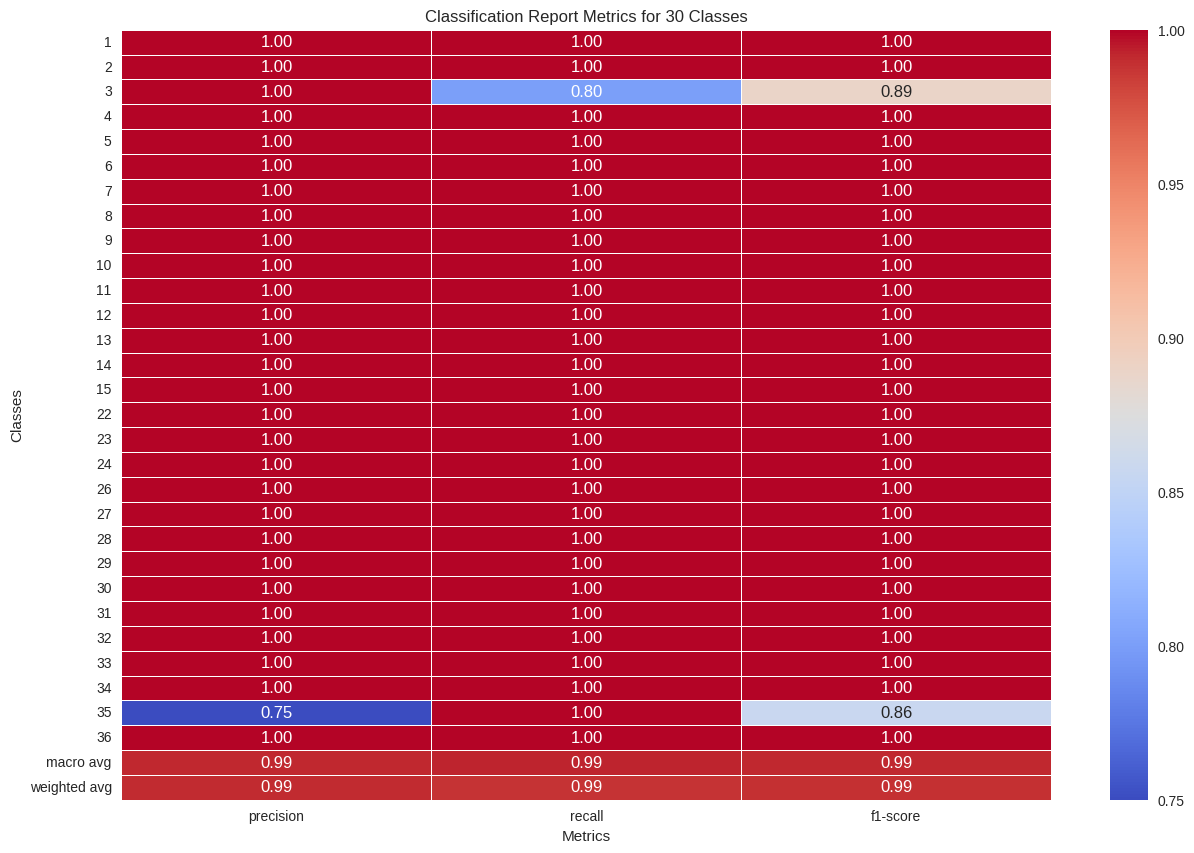

Overall Accuracy: 0.99


In [ ]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Drop 'accuracy' row and 'support' column for better visualization
df_report = df_report.drop(index=['accuracy'])
df_report = df_report.drop(columns=['support'])

# Plot the DataFrame
plt.figure(figsize=(15, 10))
sns.heatmap(df_report, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Classification Report Metrics for 30 Classes')
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

# Print the overall accuracy
print(f"Overall Accuracy: {overall_accuracy:.2f}")

## **Combine Clustering and Classification**

In [ ]:
df_train

target        1       2        3        4        5         6         7  \
0         1  0.72694  1.4742  0.32396  0.98535  1.00000  0.835920  0.004657   
1         1  0.74173  1.5257  0.36116  0.98152  0.99825  0.798670  0.005242   
2         1  0.76722  1.5725  0.38998  0.97755  1.00000  0.808120  0.007457   
3         1  0.73797  1.4597  0.35376  0.97566  1.00000  0.816970  0.006877   
4         1  0.82301  1.7707  0.44462  0.97698  1.00000  0.754930  0.007428   
..      ...      ...     ...      ...      ...      ...       ...       ...   
335      36  0.37522  1.1417  0.81725  0.68511  0.58772  0.125230  0.091860   
336      36  0.28064  1.0849  0.75319  0.72152  0.71404  0.136860  0.078996   
337      36  0.35344  1.0329  0.78147  0.70737  0.61579  0.135030  0.089763   
338      36  0.59988  1.1427  0.71532  0.66101  0.47544  0.157470  0.113370   
339      36  0.47195  1.0901  0.85409  0.53598  0.39649  0.078376  0.132270   

            8         9  ...  2600  2601      2602      2603      2604  \
0    0.003947  0.047790  ...   0.0   0.0  0.000302  0.047924  0.093215   
1    0.005002  0.024160  ...   0.0   0.0  0.000347  0.035323  0.041192   
2    0.010121  0.011897  ...   0.0   0.0  0.002724  0.042494  0.006809   
3    0.008607  0.015950  ...   0.0   0.0  0.016061  0.046267  0.007989   
4    0.010042  0.007938  ...   0.0   0.0  0.007007  0.024181  0.004408   
..        ...       ...  ...   ...   ...       ...       ...       ...   
335  1.535800  0.114880  ...   0.0   0.0  0.000258  0.006332  0.089712   
336  1.135800  0.141220  ...   0.0   0.0  0.000182  0.007216  0.119102   
337  1.466400  0.097663  ...   0.0   0.0  0.000212  0.007328  0.043223   
338  2.339400  0.050389  ...   0.0   0.0  0.003116  0.009857  0.120015   
339  3.184000  0.082007  ...   0.0   0.0  0.001479  0.024808  0.095216   

         2605      2606      2607      2608  \
0    0.014512  0.011357  0.023729  0.994038   
1    0.007870  0.009124  0.062162  0.996517   
2    0.005030  0.003446  0.152830  0.987292   
3    0.006813  0.006977  0.104655  0.993222   
4    0.002828  0.004153  0.060365  0.997837   
..        ...       ...       ...       ...   
335  0.248005  0.082607  0.230372  0.933011   
336  0.337698  0.052663  0.135247  0.922311   
337  0.187618  0.265604  0.940853  0.084428   
338  0.069171  0.035060  0.275599  0.950537   
339  0.204124  0.147789  0.755090  0.597200   

                                             2609  
0     ./drive/MyDrive/leaves/1/iPAD2_C01_EX01.JPG  
1     ./drive/MyDrive/leaves/1/iPAD2_C01_EX02.JPG  
2     ./drive/MyDrive/leaves/1/iPAD2_C01_EX03.JPG  
3     ./drive/MyDrive/leaves/1/iPAD2_C01_EX04.JPG  
4     ./drive/MyDrive/leaves/1/iPAD2_C01_EX05.JPG  
..                                            ...  
335  ./drive/MyDrive/leaves/36/iPAD2_C36_EX06.JPG  
336  ./drive/MyDrive/leaves/36/iPAD2_C36_EX07.JPG  
337  ./drive/MyDrive/leaves/36/iPAD2_C36_EX08.JPG  
338  ./drive/MyDrive/leaves/36/iPAD2_C36_EX09.JPG  
339  ./drive/MyDrive/leaves/36/iPAD2_C36_EX10.JPG  

[340 rows x 2610 columns]

In [ ]:
# define the model
model = GaussianMixture(n_components=30)
# fit model and predict clusters
yhat = model.fit_predict(X_pca)
# retrieve unique clusters
clusters = np.unique(yhat)

In [ ]:
yhat

array([25, 25, 25, 25, 25, 25, 25, 25, 25, 25,  1, 25,  9,  9,  9,  9,  9,
        9, 25,  9,  9, 19, 24,  0, 24, 24, 24, 24, 24,  0, 24, 24,  2,  2,
        2,  2,  2,  2,  2,  2, 27, 27, 27, 27, 12, 27, 27, 27, 12, 12, 12,
       12,  6,  6,  6,  6,  6,  6,  6,  6, 21, 21, 21, 21, 21, 21, 21, 25,
       21, 21,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 11, 11, 11, 11,
       11, 11,  2, 22, 11, 11, 11, 11, 11,  2, 11, 11, 11, 11, 11, 29, 29,
       29, 18, 29, 29, 18, 18,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       19, 19, 19, 25, 19, 19, 19, 19, 19, 19, 19, 19, 19,  9,  9, 23,  9,
       23,  9, 23, 23,  9, 23, 23, 23, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 19, 25, 25, 25, 25, 19, 25, 25, 14, 19,
       19, 25, 25, 17, 17, 17, 17, 17, 17, 17, 17, 17, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14

In [ ]:
df_with_clustering = df_train.copy()

In [ ]:
df_with_clustering['clustering'] = yhat

In [ ]:
df_with_clustering

target        1       2        3        4        5         6         7  \
0         1  0.72694  1.4742  0.32396  0.98535  1.00000  0.835920  0.004657   
1         1  0.74173  1.5257  0.36116  0.98152  0.99825  0.798670  0.005242   
2         1  0.76722  1.5725  0.38998  0.97755  1.00000  0.808120  0.007457   
3         1  0.73797  1.4597  0.35376  0.97566  1.00000  0.816970  0.006877   
4         1  0.82301  1.7707  0.44462  0.97698  1.00000  0.754930  0.007428   
..      ...      ...     ...      ...      ...      ...       ...       ...   
335      36  0.37522  1.1417  0.81725  0.68511  0.58772  0.125230  0.091860   
336      36  0.28064  1.0849  0.75319  0.72152  0.71404  0.136860  0.078996   
337      36  0.35344  1.0329  0.78147  0.70737  0.61579  0.135030  0.089763   
338      36  0.59988  1.1427  0.71532  0.66101  0.47544  0.157470  0.113370   
339      36  0.47195  1.0901  0.85409  0.53598  0.39649  0.078376  0.132270   

            8         9  ...  2601      2602      2603      2604      2605  \
0    0.003947  0.047790  ...   0.0  0.000302  0.047924  0.093215  0.014512   
1    0.005002  0.024160  ...   0.0  0.000347  0.035323  0.041192  0.007870   
2    0.010121  0.011897  ...   0.0  0.002724  0.042494  0.006809  0.005030   
3    0.008607  0.015950  ...   0.0  0.016061  0.046267  0.007989  0.006813   
4    0.010042  0.007938  ...   0.0  0.007007  0.024181  0.004408  0.002828   
..        ...       ...  ...   ...       ...       ...       ...       ...   
335  1.535800  0.114880  ...   0.0  0.000258  0.006332  0.089712  0.248005   
336  1.135800  0.141220  ...   0.0  0.000182  0.007216  0.119102  0.337698   
337  1.466400  0.097663  ...   0.0  0.000212  0.007328  0.043223  0.187618   
338  2.339400  0.050389  ...   0.0  0.003116  0.009857  0.120015  0.069171   
339  3.184000  0.082007  ...   0.0  0.001479  0.024808  0.095216  0.204124   

         2606      2607      2608  \
0    0.011357  0.023729  0.994038   
1    0.009124  0.062162  0.996517   
2    0.003446  0.152830  0.987292   
3    0.006977  0.104655  0.993222   
4    0.004153  0.060365  0.997837   
..        ...       ...       ...   
335  0.082607  0.230372  0.933011   
336  0.052663  0.135247  0.922311   
337  0.265604  0.940853  0.084428   
338  0.035060  0.275599  0.950537   
339  0.147789  0.755090  0.597200   

                                             2609  clustering  
0     ./drive/MyDrive/leaves/1/iPAD2_C01_EX01.JPG          25  
1     ./drive/MyDrive/leaves/1/iPAD2_C01_EX02.JPG          25  
2     ./drive/MyDrive/leaves/1/iPAD2_C01_EX03.JPG          25  
3     ./drive/MyDrive/leaves/1/iPAD2_C01_EX04.JPG          25  
4     ./drive/MyDrive/leaves/1/iPAD2_C01_EX05.JPG          25  
..                                            ...         ...  
335  ./drive/MyDrive/leaves/36/iPAD2_C36_EX06.JPG          10  
336  ./drive/MyDrive/leaves/36/iPAD2_C36_EX07.JPG          10  
337  ./drive/MyDrive/leaves/36/iPAD2_C36_EX08.JPG          10  
338  ./drive/MyDrive/leaves/36/iPAD2_C36_EX09.JPG          10  
339  ./drive/MyDrive/leaves/36/iPAD2_C36_EX10.JPG          12  

[340 rows x 2611 columns]

Average Accuracy: 98.64%
Variance: 0.0001
Max Accuracy: 100.00%
Min Accuracy: 96.47%
Standard Deviation: 0.0109


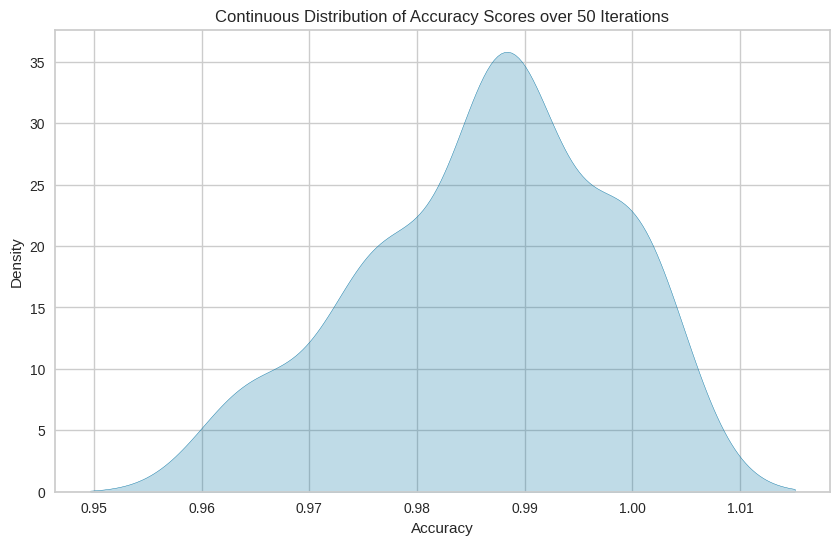

In [ ]:
acc_std_model['ridge_PCA'] = model_analysis('PCA', 'ridge', df_with_clustering, 50)

Average Accuracy: 98.96%
Variance: 0.0001
Max Accuracy: 100.00%
Min Accuracy: 96.47%
Standard Deviation: 0.0090


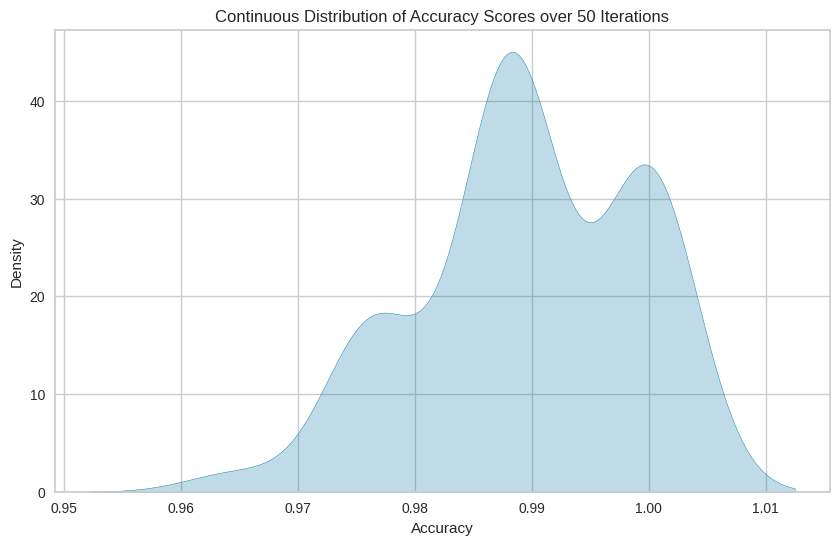

In [ ]:
acc_std_model['ridge_PCA'] = model_analysis('PCA', 'ridge', df_train, 50)

True Label = 13
Predict Label = 1
------------------------------------------------


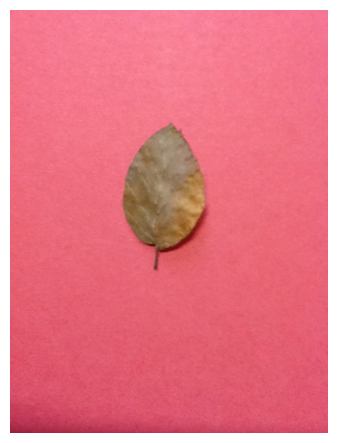

------------------------------------------------
True Class Images:


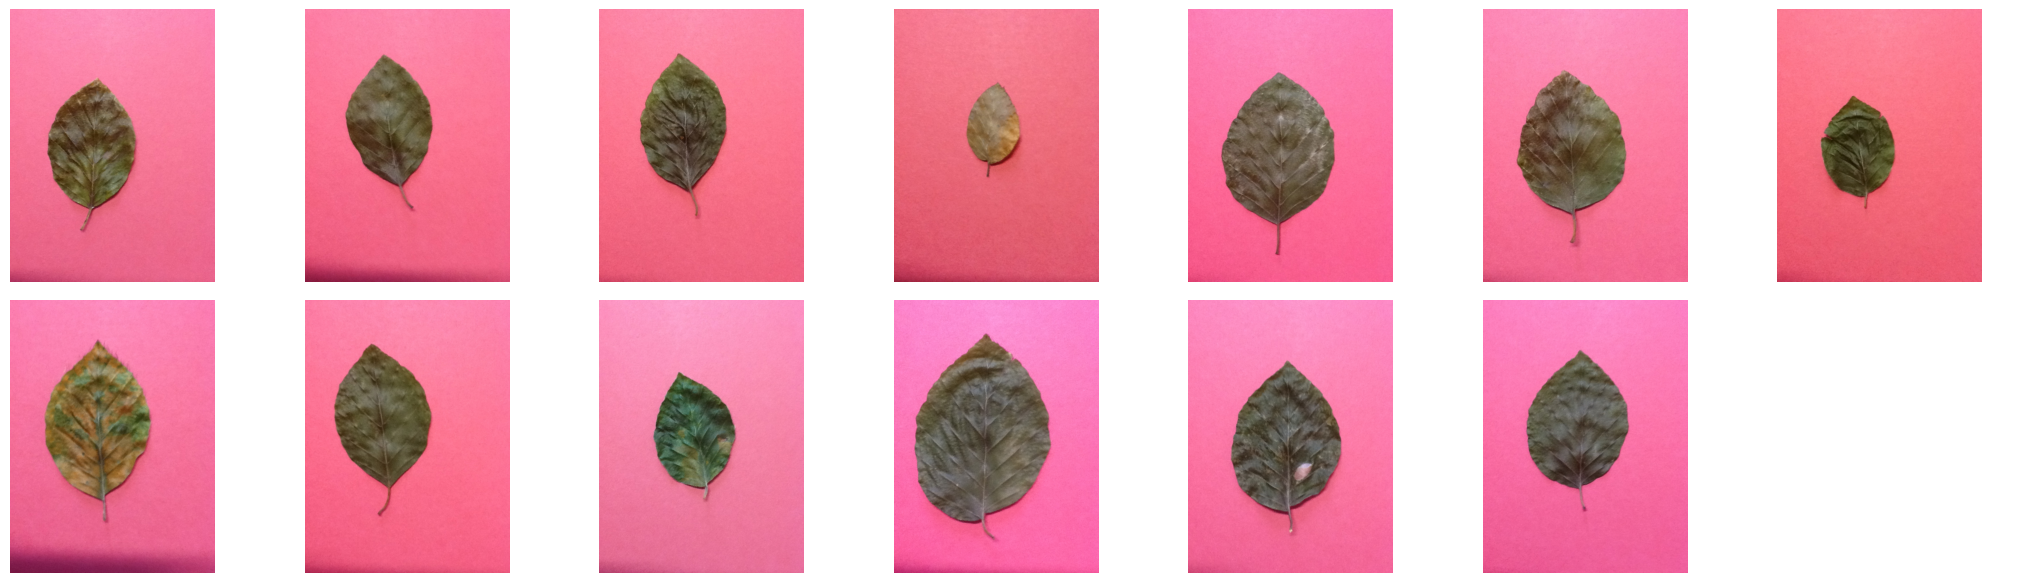

------------------------------------------------
Predict Class Images:


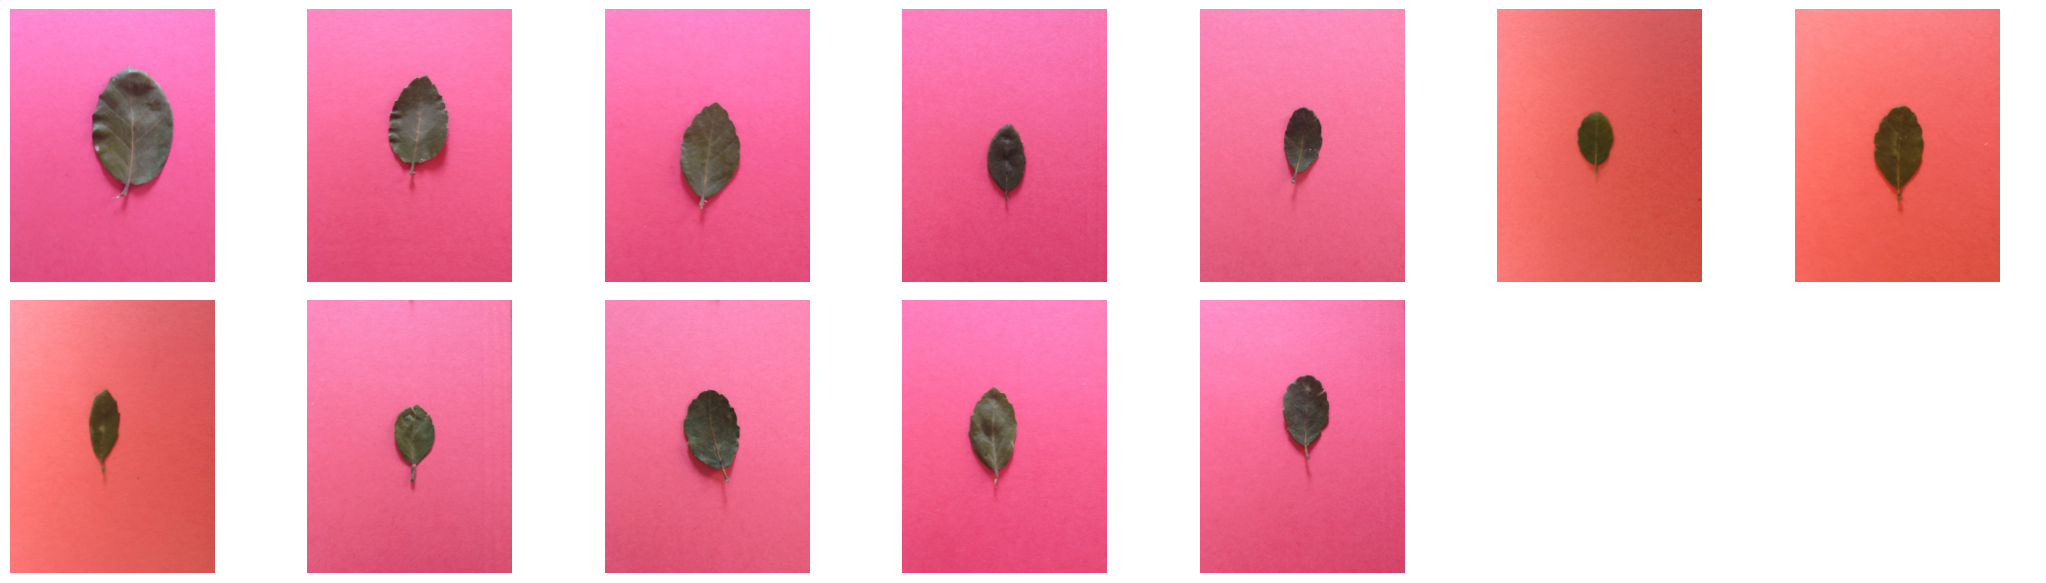

************************************************
True Label = 27
Predict Label = 29
------------------------------------------------


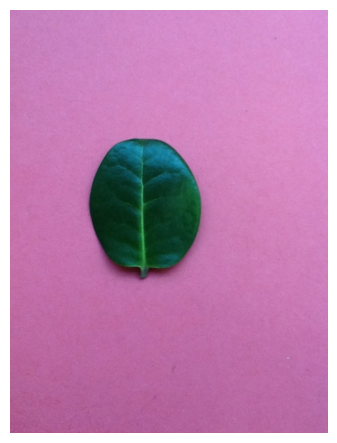

------------------------------------------------
True Class Images:


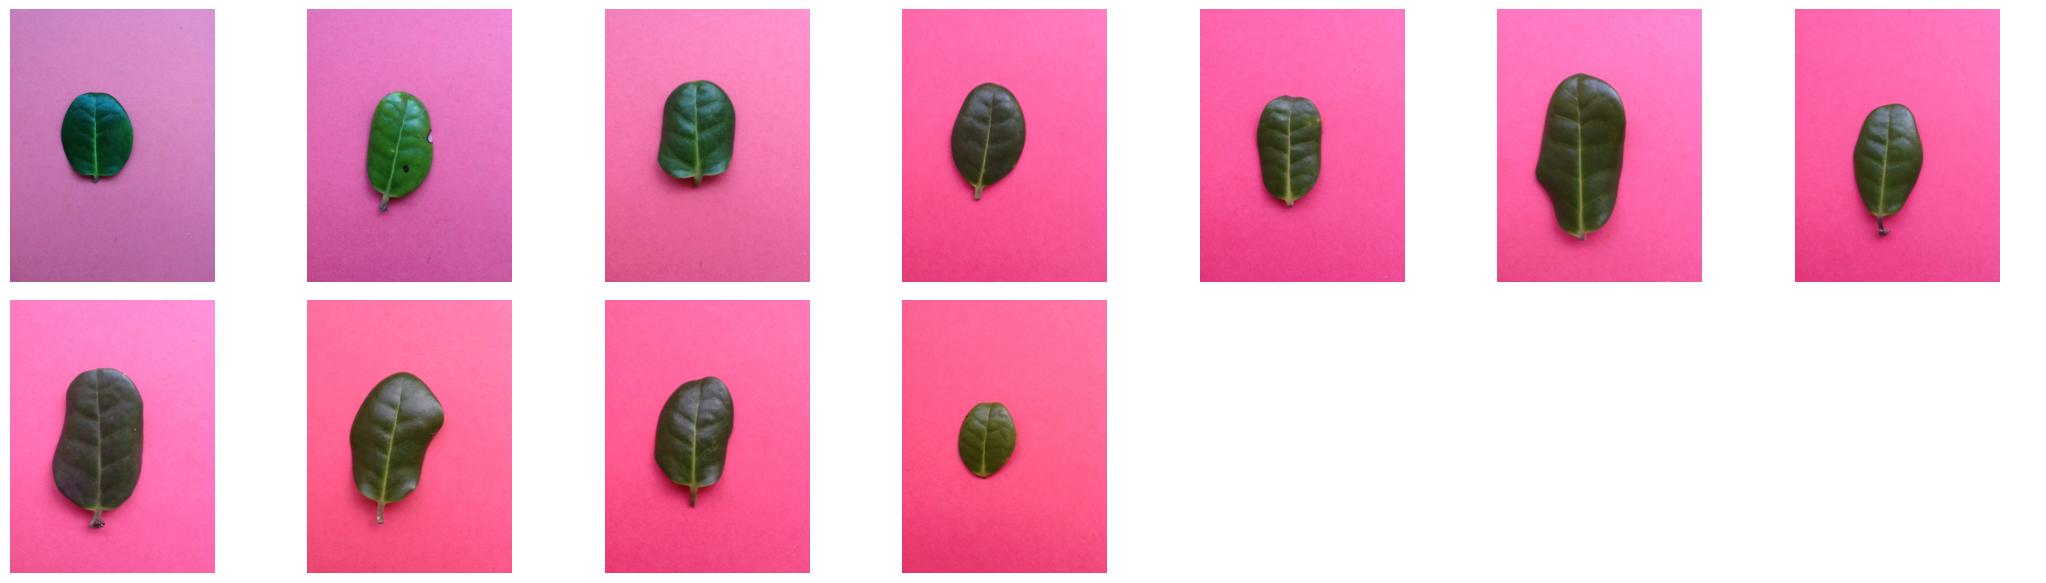

------------------------------------------------
Predict Class Images:


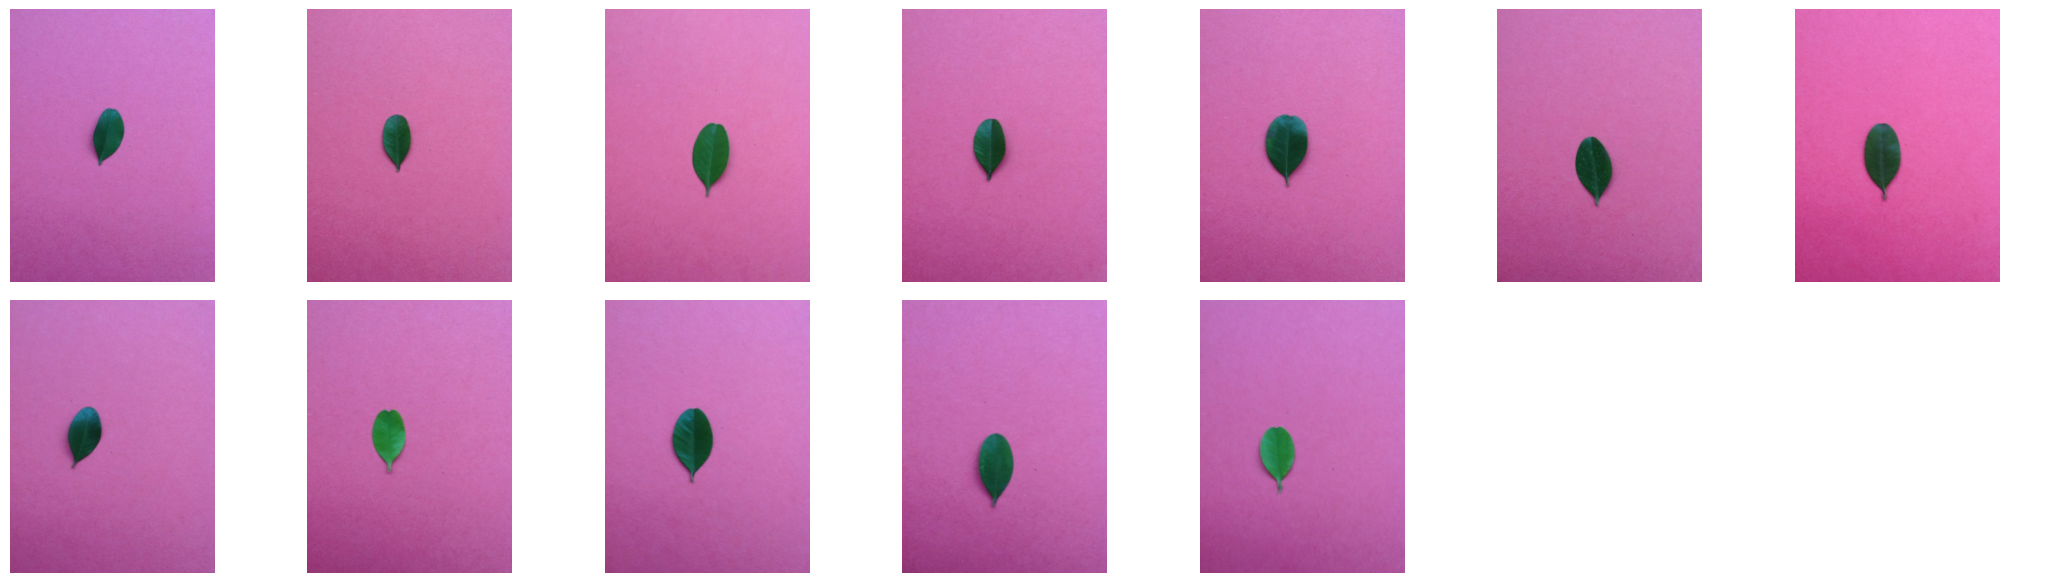

************************************************
Average Accuracy: 99.22%
Variance: 0.0000
Max Accuracy: 100.00%
Min Accuracy: 98.82%
Standard Deviation: 0.0055


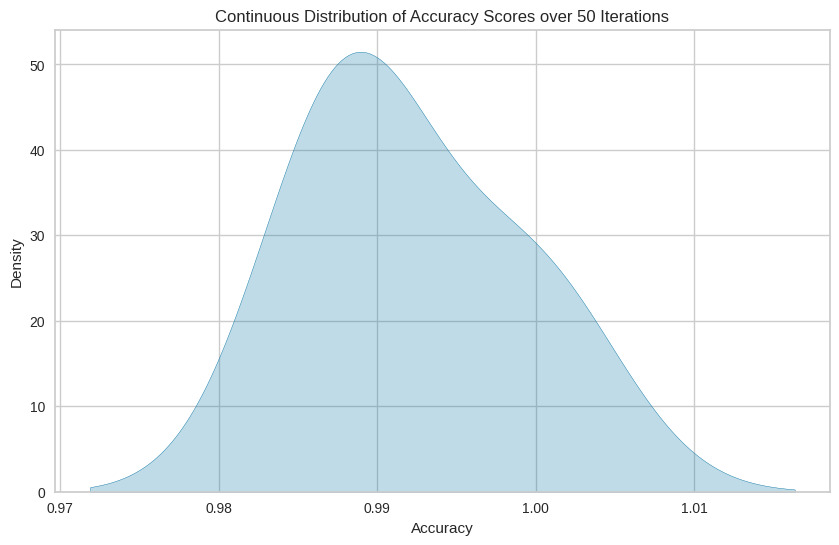

In [ ]:
acc_std_model['ridge_PCA'] = model_analysis('PCA', 'ridge', df_train, 3, True)